# Определение перспективного тарифа для телеком-компании
# Цель проекта:
Выявить какой тариф прибыльнее для компании. Результат исследования - выяснение прибыльности тарифов, а также влияние на прибыльность поведенческих факторов пользователей.

Также исследованию предстоит проверить 2 гипотезы:
* средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
* средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

**Описание:**

Нужно проанализировать поведение клиентов из данных 500 пользователей: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Коммерческий департамент хочет понять, какой тариф приносит больше денег из двух тарифных планов, для корректировки рекламного бюджета.

В нашем распоряжении данные представленые  в 5 таблицах:
* Таблица users (информация о пользователях)
* Таблица calls (информация о звонках)
* Таблица messages (информация о сообщениях)
* Таблица internet (информация об интернет-сессиях)
* Таблица tariffs (информация о тарифах)


## Изучение данных из файлов

Прочитаем отдельно все таблицы. Каждую предварительно изучим на корректность. Объединим в один дата фрейм, по необходимым критериям. Предварительно импортируем все необходимые библиотеки, создадим функции для просмотра данных.

In [1]:
# импорт библиотеки pandas
import pandas as pd
# импорт библиотеки seaborn
import seaborn as sns
# импорт библиотеки matplotlib
import matplotlib.pyplot as plt
# импорт библиотеки numpy
import numpy as np
# импорт библиотеки datetime
import datetime
# импорт библиотеки scipy
from scipy import stats as st

In [2]:
# создадим фукцию для вывода общей инфрмации по таблице целиком
def tab_info(df_x, name):
# получение первых строк таблицы df
    print('Первые строки таблицы', name)
    try:
        display(df_x.head(10))
    except:
        display(df_x.head(2))
# получение случайных строк таблицы df
    print('Cлучайные строки таблицы', name)
    try:
        display(df_x.sample(10))
    except:
        display(df_x.sample(2))
# получение последних строк таблицы df
    print('Последние строки таблицы', name)
    try:
        display(df_x.tail(10))
    except:
        display(df_x.tail(2))
# получение cводной информации по параметрам данных
    print('Сводная информация по параметрам данных', name)
    display(df_x.describe())
# подсчет количества отсутствующих значений
    print('Количество отсутствующих значений', name)
    display(df_x.isna().sum())
# подсчет доли отсутствующих значений с округлением
    print('Доли отсутствующих значений с округлением', name)
    display(round(df_x.isna().sum() * 100 / len(df_x), 2))
# подсчет количества задублированных записей
    print('Задублированных записей', name)
    display(df_x.duplicated().sum())    
# получение общей информации о данных в таблице
    print('Общая информация о данных в таблице', name)
    display(df_x.info())

In [3]:
# создадим фукцию для вывода инфрмации по столбцу таблицы для числовых данных
def col_info_num(df_x, name):
# выведем тип данных столбца
    print('Тип данных', name)
    display(df_x[name].dtypes)
# анализ столбца методом подсчета уникальных значений и количества их упоминаний
    print('Уникальных значений и количество их упоминаний в столбце', name)
    display(df_x[name].value_counts())
# посмотрим максимальные значения
    print('Максимальные значения столбца', name)
    display(df_x.nlargest(10, name))
# получение случайных 10 строк
    print('Cлучайные 10 строк')
    display(df_x.sample(10))   
# посмотрим минимальные значения
    print('Минимальные значения столбца', name)
    display(df_x.nsmallest(10, name))
# проверим столбец на отрицательные значения    
    print('Отрицательные значения столбца', name)
    display(df_x.loc[df_x.loc[:,name] < 0][name].count())
# подсчет отсутствующих значений
    print('Отсутствующие значения', name)
    display(df_x[name].isna().sum())
# подсчет доли отсутствующих значений с округлением
    print('Доли отсутствующих значений с округлением', name)
    display(round(df_x[name].isna().sum() * 100 / len(df_x[name]), 2))
# получение cводной информации по параметрам данных
    print('Сводная информация по параметрам данных', name)
    display(df_x[name].describe())
# построим график распределения данных
    print('График распределения данных', name)
    plt.boxplot(x=df_x[name]);

In [4]:
# создадим фукцию для вывода инфрмации по столбцу таблицы для не числовых данных
def col_info_not_num(df_x, name):
# выведем тип данных столбца
    print('Тип данных', name)
    display(df_x[name].dtypes)
# анализ столбца методом подсчета уникальных значений и количества их упоминаний
    print('Уникальных значений и количество их упоминаний в столбце', name)
    display(df_x[name].value_counts())
# получение случайных 10 строк
    print('Cлучайные 10 строк')
    display(df_x.sample(10))
# подсчет отсутствующих значений
    print('Отсутствующие значения', name)
    display(df_x[name].isna().sum())
# подсчет доли отсутствующих значений с округлением
    print('Доли отсутствующих значений с округлением', name)
    display(round(df_x[name].isna().sum() * 100 / len(df_x[name]), 2))

### Таблица users (информация о пользователях):

In [5]:
# чтение файлов с данными и сохранение в df_users
df_users = pd.read_csv('/datasets/users.csv') 

In [6]:
# вывод общей инфрмации по таблице целиком
tab_info(df_users, 'users (информация о пользователях)')

Первые строки таблицы users (информация о пользователях)


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


Cлучайные строки таблицы users (информация о пользователях)


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
237,1237,43,NaN,Москва,Алина,Кошелева,2018-11-04,smart
308,1308,52,NaN,Москва,Инесса,Корнилова,2018-01-04,smart
299,1299,37,NaN,Уфа,Мариетта,Симонова,2018-01-27,smart
466,1466,37,NaN,Новосибирск,Рубен,Шевцов,2018-02-28,ultra
244,1244,68,NaN,Москва,Геральд,Макеев,2018-05-09,smart
443,1443,21,NaN,Казань,Иван,Афинин,2018-09-17,smart
77,1077,18,NaN,Москва,Марица,Кольцова,2018-10-23,smart
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
79,1079,20,NaN,Москва,Еремей,Авроров,2018-05-15,smart
62,1062,24,2018-12-09,Москва,Александр,Коршунов,2018-11-16,smart


Последние строки таблицы users (информация о пользователях)


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
490,1490,30,NaN,Москва,Радомир,Алесин,2018-04-03,smart
491,1491,56,NaN,Челябинск,Радислав,Андрейкин,2018-04-25,ultra
492,1492,63,NaN,Санкт-Петербург,Руслана,Артёменко,2018-06-26,smart
493,1493,71,NaN,Красноярск,Таисия,Ахматулина,2018-11-24,ultra
494,1494,62,NaN,Омск,Ренат,Андропов,2018-08-17,smart
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart
499,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart


Сводная информация по параметрам данных users (информация о пользователях)


,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


Количество отсутствующих значений users (информация о пользователях)


user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

Доли отсутствующих значений с округлением users (информация о пользователях)


user_id        0.0
age            0.0
churn_date    92.4
city           0.0
first_name     0.0
last_name      0.0
reg_date       0.0
tariff         0.0
dtype: float64

Задублированных записей users (информация о пользователях)


0

Общая информация о данных в таблице users (информация о пользователях)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

Таблица users (информация о пользователях): описание данных:
* user_id — уникальный идентификатор пользователя
* age — возраст пользователя (годы)
* churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
* city — город проживания пользователя
* first_name — имя пользователя
* last_name — фамилия пользователя
* reg_date — дата подключения тарифа (день, месяц, год)
* tariff — название тарифного плана

---
Итак, в таблице 8 столбцов и 500 строк. Названия столбцов составлены в хорошем стиле. Тип данных в столбцах — int64(2), object(6). Рассмотрим каждый столбец в отдельности.

#### user_id — уникальный идентификатор пользователя

Тип данных user_id


dtype('int64')

Уникальных значений и количество их упоминаний в столбце user_id


1023    1
1194    1
1181    1
1182    1
1183    1
       ..
1362    1
1363    1
1364    1
1365    1
1024    1
Name: user_id, Length: 500, dtype: int64

Максимальные значения столбца user_id


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
499,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
494,1494,62,NaN,Омск,Ренат,Андропов,2018-08-17,smart
493,1493,71,NaN,Красноярск,Таисия,Ахматулина,2018-11-24,ultra
492,1492,63,NaN,Санкт-Петербург,Руслана,Артёменко,2018-06-26,smart
491,1491,56,NaN,Челябинск,Радислав,Андрейкин,2018-04-25,ultra
490,1490,30,NaN,Москва,Радомир,Алесин,2018-04-03,smart


Cлучайные 10 строк


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
66,1066,47,NaN,Астрахань,Исак,Малахов,2018-06-24,smart
186,1186,21,NaN,Самара,Рэм,Абакумов,2018-02-02,smart
470,1470,23,NaN,Новокузнецк,Эллада,Лосева,2018-10-19,smart
67,1067,45,NaN,Москва,Юзефа,Абашкина,2018-04-09,smart
233,1233,28,NaN,Воронеж,Сара,Алфимова,2018-05-23,smart
224,1224,58,NaN,Магнитогорск,Ахмет,Тарасов,2018-04-24,smart
78,1078,70,NaN,Волгоград,Харитон,Литвинов,2018-06-19,ultra
167,1167,30,NaN,Кемерово,Клавдия,Абдулина,2018-09-29,ultra
100,1100,58,NaN,Санкт-Петербург,Руслан,Красильников,2018-07-02,smart
411,1411,36,NaN,Грозный,Берта,Прокофьева,2018-07-13,smart


Минимальные значения столбца user_id


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


Отрицательные значения столбца user_id


0

Отсутствующие значения user_id


0

Доли отсутствующих значений с округлением user_id


0.0

Сводная информация по параметрам данных user_id


count     500.000000
mean     1249.500000
std       144.481833
min      1000.000000
25%      1124.750000
50%      1249.500000
75%      1374.250000
max      1499.000000
Name: user_id, dtype: float64

График распределения данных user_id


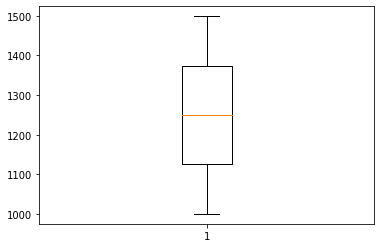

In [7]:
# вывод инфрмации по столбцу таблицы
col_info_num(df_users, 'user_id')

##### Выводы
* Тип данных: int64 соответствует смыслу
* Артефакты: не обнаружено
* Пропуски: нет
* Стиль значений: в хорошем стиле

**Рекомедации к обработке: нет, данные в порядке**

#### age — возраст пользователя (годы)

Тип данных age


dtype('int64')

Уникальных значений и количество их упоминаний в столбце age


53    14
42    14
63    13
71    13
64    13
73    12
21    12
40    12
39    11
47    11
29    11
26    11
37    11
41    10
36    10
58    10
45    10
70    10
52    10
51     9
27     9
48     9
50     9
28     9
30     9
24     9
20     9
19     9
56     9
23     9
68     9
66     9
65     9
69     8
62     8
60     8
44     8
55     8
25     7
43     7
67     7
35     7
74     7
32     7
31     7
46     7
75     6
54     6
59     6
18     6
33     5
34     5
38     5
22     5
72     5
49     4
57     4
61     3
Name: age, dtype: int64

Максимальные значения столбца age


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
177,1177,75,NaN,Новосибирск,Лолита,Аничкина,2018-06-19,smart
219,1219,75,NaN,Киров,Кузьма,Некрасов,2018-01-21,smart
254,1254,75,2018-08-17,Москва,Александра,Сухарева,2018-01-04,ultra
356,1356,75,NaN,Москва,Евгений,Гончаров,2018-04-18,ultra
436,1436,75,NaN,Москва,Радим,Ерофеев,2018-04-04,ultra
478,1478,75,NaN,Грозный,Таира,Константинова,2018-07-16,smart
123,1123,74,NaN,Краснодар,Вениамин,Устинов,2018-03-18,smart
216,1216,74,NaN,Волгоград,Рустам,Малинин,2018-11-23,smart
243,1243,74,NaN,Пермь,Артём,Леонтьев,2018-06-01,ultra
364,1364,74,NaN,Екатеринбург,Мстислав,Алексеенко,2018-08-29,ultra


Cлучайные 10 строк


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
347,1347,29,NaN,Москва,Лола,Фокина,2018-11-01,ultra
220,1220,59,NaN,Ростов-на-Дону,Рубен,Астапов,2018-11-22,smart
331,1331,26,NaN,Москва,Юлия,Малинина,2018-04-12,ultra
418,1418,30,NaN,Новосибирск,Мстислав,Ахматов,2018-10-23,smart
19,1019,63,2018-10-05,Томск,Игнатий,Круглов,2018-05-16,ultra
376,1376,46,NaN,Самара,Пётр,Акимов,2018-05-31,smart
53,1053,64,NaN,Ростов-на-Дону,Ренальд,Фёдоров,2018-09-30,ultra
444,1444,35,NaN,Нижний Новгород,Иулиан,Воронин,2018-11-07,smart
242,1242,39,2018-12-21,Хабаровск,Радим,Федосеев,2018-11-18,smart
144,1144,65,NaN,Улан-Удэ,Ефим,Ефремов,2018-04-29,smart


Минимальные значения столбца age


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
77,1077,18,NaN,Москва,Марица,Кольцова,2018-10-23,smart
204,1204,18,NaN,Москва,Мирослава,Лазарева,2018-01-04,smart
268,1268,18,NaN,Москва,Трофим,Трошин,2018-05-28,smart
270,1270,18,NaN,Нижневартовск,Мальвина,Вешнякова,2018-07-01,ultra
403,1403,18,NaN,Брянск,Ахмет,Амелин,2018-05-20,ultra
473,1473,18,NaN,Красноярск,Николай,Лебедев,2018-08-05,ultra
89,1089,19,NaN,Иркутск,Ксения,Нечаева,2018-02-24,ultra
154,1154,19,NaN,Волжский,Марина,Тихомирова,2018-06-02,smart
165,1165,19,NaN,Самара,Алексей,Медведев,2018-10-14,ultra
195,1195,19,NaN,Москва,Веселина,Петухова,2018-10-14,smart


Отрицательные значения столбца age


0

Отсутствующие значения age


0

Доли отсутствующих значений с округлением age


0.0

Сводная информация по параметрам данных age


count    500.00000
mean      46.58800
std       16.66763
min       18.00000
25%       32.00000
50%       46.00000
75%       62.00000
max       75.00000
Name: age, dtype: float64

График распределения данных age


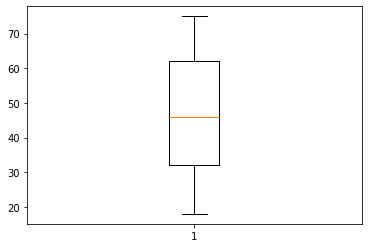

In [8]:
# вывод инфрмации по столбцу таблицы
col_info_num(df_users, 'age')

##### Выводы
* Тип данных: int64 соответствует смыслу
* Артефакты: не обнаружено
* Пропуски: нет
* Стиль значений: в хорошем стиле

**Рекомедации к обработке: нет, данные в порядке**

#### churn_date — дата прекращения пользования тарифом

In [9]:
# вывод инфрмации по столбцу таблицы
col_info_not_num(df_users, 'churn_date')

Тип данных churn_date


dtype('O')

Уникальных значений и количество их упоминаний в столбце churn_date


2018-12-21    2
2018-10-14    2
2018-12-03    2
2018-12-09    2
2018-10-03    2
2018-11-13    1
2018-11-16    1
2018-12-24    1
2018-11-21    1
2018-11-27    1
2018-11-07    1
2018-12-14    1
2018-08-31    1
2018-09-27    1
2018-12-11    1
2018-11-22    1
2018-12-20    1
2018-08-17    1
2018-12-23    1
2018-11-26    1
2018-12-25    1
2018-10-28    1
2018-09-02    1
2018-12-18    1
2018-12-30    1
2018-12-16    1
2018-10-27    1
2018-10-04    1
2018-10-25    1
2018-10-05    1
2018-11-30    1
2018-12-26    1
2018-09-26    1
Name: churn_date, dtype: int64

Cлучайные 10 строк


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
179,1179,43,NaN,Вологда,Дана,Астапенко,2018-04-19,smart
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
42,1042,42,NaN,Хабаровск,Константин,Добрынин,2018-11-25,smart
441,1441,62,NaN,Самара,Леонтий,Белозёров,2018-11-07,smart
146,1146,72,NaN,Санкт-Петербург,Владислав,Никонов,2018-05-25,smart
492,1492,63,NaN,Санкт-Петербург,Руслана,Артёменко,2018-06-26,smart
276,1276,30,NaN,Москва,Михаил,Крюков,2018-10-05,ultra
101,1101,27,NaN,Казань,Онисим,Колобов,2018-05-21,smart
301,1301,26,NaN,Махачкала,Наида,Авраменко,2018-09-27,smart
453,1453,50,NaN,Москва,Кузьма,Акуленко,2018-01-01,ultra


Отсутствующие значения churn_date


462

Доли отсутствующих значений с округлением churn_date


92.4

##### Выводы
* Тип данных: object не соответствует смыслу, необходим datetime
* Артефакты: не обнаружены
* Пропуски: если значение пропущено, то тариф ещё действовал на момент выгрузки данных, поэтому оставляем пропуски.
* Стиль значений: в хорошем стиле

**Рекомедации к обработке: Тип данных: object в datetime**

#### city — город проживания пользователя

In [10]:
# вывод инфрмации по столбцу таблицы
col_info_not_num(df_users, 'city')

Тип данных city


dtype('O')

Уникальных значений и количество их упоминаний в столбце city


Москва             99
Санкт-Петербург    39
Новосибирск        16
Казань             14
Омск               14
                   ..
Химки               1
Иваново             1
Подольск            1
Архангельск         1
Нижневартовск       1
Name: city, Length: 76, dtype: int64

Cлучайные 10 строк


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
39,1039,40,NaN,Ярославль,Агнесса,Андреенко,2018-06-21,ultra
79,1079,20,NaN,Москва,Еремей,Авроров,2018-05-15,smart
429,1429,54,NaN,Санкт-Петербург,Джулия,Белякова,2018-01-26,smart
435,1435,32,NaN,Москва,Евфросинья,Азимова,2018-02-17,smart
486,1486,35,NaN,Нижний Новгород,Матвей,Моргунов,2018-10-31,smart
492,1492,63,NaN,Санкт-Петербург,Руслана,Артёменко,2018-06-26,smart
360,1360,46,NaN,Санкт-Петербург,Лаура,Макарова,2018-03-18,ultra
210,1210,33,NaN,Севастополь,Евфросинья,Серебрякова,2018-07-29,smart
276,1276,30,NaN,Москва,Михаил,Крюков,2018-10-05,ultra
239,1239,68,NaN,Самара,Даниил,Ёрохов,2018-06-12,smart


Отсутствующие значения city


0

Доли отсутствующих значений с округлением city


0.0

##### Выводы
* Тип данных: object соответствует смыслу
* Артефакты: не обнаружены
* Пропуски: нет
* Стиль значений: привести к одному - нижнему - регистру

**Рекомедации к обработке: привести нижнему регистру**

#### first_name — имя пользователя

In [11]:
# вывод инфрмации по столбцу таблицы
col_info_not_num(df_users, 'first_name')

Тип данных first_name


dtype('O')

Уникальных значений и количество их упоминаний в столбце first_name


Радим         6
Пётр          5
Леонид        5
Габриель      4
Адам          4
             ..
Джулия        1
Николай       1
Фаддей        1
Эсмеральда    1
Трофим        1
Name: first_name, Length: 246, dtype: int64

Cлучайные 10 строк


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
60,1060,46,NaN,Калуга,Яков,Рудаков,2018-11-24,ultra
380,1380,45,NaN,Ростов-на-Дону,Доминика,Карасева,2018-05-07,ultra
100,1100,58,NaN,Санкт-Петербург,Руслан,Красильников,2018-07-02,smart
10,1010,26,NaN,Тюмень,Эдуард,Кононов,2018-08-05,smart
472,1472,53,NaN,Ярославль,Наида,Боброва,2018-01-18,smart
356,1356,75,NaN,Москва,Евгений,Гончаров,2018-04-18,ultra
438,1438,24,2018-12-24,Екатеринбург,Нателла,Бородина,2018-10-05,smart
465,1465,41,NaN,Омск,Пётр,Ёркин,2018-04-14,smart
421,1421,30,NaN,Калининград,Гайдар,Александрович,2018-02-22,smart
109,1109,64,NaN,Санкт-Петербург,Екатерина,Андрющенко,2018-02-23,smart


Отсутствующие значения first_name


0

Доли отсутствующих значений с округлением first_name


0.0

##### Выводы
* Тип данных: object соответствует смыслу
* Артефакты: не обнаружены
* Пропуски: нет
* Стиль значений: привести к одному - нижнему - регистру

**Рекомедации к обработке: привести нижнему регистру**

#### last_name — фамилия пользователя

In [12]:
# вывод инфрмации по столбцу таблицы
col_info_not_num(df_users, 'last_name')

Тип данных last_name


dtype('O')

Уникальных значений и количество их упоминаний в столбце last_name


Андреенко     5
Абашкина      3
Алексеенко    3
Аничкина      3
Аркадьев      3
             ..
Казакова      1
Савельева     1
Абрамычева    1
Черняев       1
Кононов       1
Name: last_name, Length: 419, dtype: int64

Cлучайные 10 строк


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
176,1176,37,NaN,Волгоград,Радим,Куприянов,2018-01-20,smart
174,1174,29,NaN,Санкт-Петербург,Лолита,Розанова,2018-02-17,smart
198,1198,26,NaN,Ярославль,Эдуард,Швецов,2018-08-15,smart
105,1105,51,NaN,Улан-Удэ,Рузана,Рыбакова,2018-09-29,smart
375,1375,53,NaN,Пенза,Мария,Акимычева,2018-01-04,ultra
57,1057,43,NaN,Москва,Динара,Дьячкова,2018-03-12,ultra
207,1207,57,NaN,Балашиха,Яна,Зеленина,2018-08-12,smart
360,1360,46,NaN,Санкт-Петербург,Лаура,Макарова,2018-03-18,ultra
309,1309,28,NaN,Казань,Юлия,Касьянова,2018-10-05,ultra
418,1418,30,NaN,Новосибирск,Мстислав,Ахматов,2018-10-23,smart


Отсутствующие значения last_name


0

Доли отсутствующих значений с округлением last_name


0.0

##### Выводы
* Тип данных: object соответствует смыслу
* Артефакты: не обнаружены
* Пропуски: нет
* Стиль значений: привести к одному - нижнему - регистру

**Рекомедации к обработке: привести нижнему регистру**

#### reg_date — дата подключения тарифа (день, месяц, год)

In [13]:
# вывод инфрмации по столбцу таблицы
col_info_not_num(df_users, 'reg_date')

Тип данных reg_date


dtype('O')

Уникальных значений и количество их упоминаний в столбце reg_date


2018-05-28    8
2018-11-16    5
2018-01-04    5
2018-07-16    5
2018-10-05    5
             ..
2018-07-21    1
2018-11-06    1
2018-11-28    1
2018-08-22    1
2018-11-14    1
Name: reg_date, Length: 270, dtype: int64

Cлучайные 10 строк


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
448,1448,42,NaN,Кострома,Ростислав,Дроздов,2018-09-16,smart
375,1375,53,NaN,Пенза,Мария,Акимычева,2018-01-04,ultra
141,1141,52,NaN,Москва,Клариса,Короткова,2018-12-02,smart
52,1052,52,NaN,Санкт-Петербург,Павел,Панов,2018-07-27,smart
19,1019,63,2018-10-05,Томск,Игнатий,Круглов,2018-05-16,ultra
392,1392,54,2018-09-27,Челябинск,Алла,Беликова,2018-02-27,ultra
420,1420,53,NaN,Сочи,Анатолий,Корольков,2018-09-19,smart
272,1272,61,NaN,Пенза,Мстислав,Демьянов,2018-08-29,ultra
164,1164,49,NaN,Магнитогорск,Геральд,Лебедев,2018-04-03,smart
124,1124,54,NaN,Махачкала,Альбин,Андрианов,2018-09-24,ultra


Отсутствующие значения reg_date


0

Доли отсутствующих значений с округлением reg_date


0.0

##### Выводы
* Тип данных: object не соответствует смыслу, необходим datetime
* Артефакты: не обнаружены
* Пропуски: нет
* Стиль значений: в хорошем стиле

**Рекомедации к обработке: Тип данных: object в datetime**

#### tariff — название тарифного плана

In [14]:
# вывод инфрмации по столбцу таблицы
col_info_not_num(df_users, 'tariff')

Тип данных tariff


dtype('O')

Уникальных значений и количество их упоминаний в столбце tariff


smart    351
ultra    149
Name: tariff, dtype: int64

Cлучайные 10 строк


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
471,1471,35,NaN,Вологда,Элеонора,Гаврилова,2018-02-26,ultra
486,1486,35,NaN,Нижний Новгород,Матвей,Моргунов,2018-10-31,smart
389,1389,29,NaN,Москва,Надежда,Латышева,2018-07-20,smart
427,1427,24,NaN,Казань,Ириней,Азаров,2018-04-03,smart
462,1462,72,NaN,Тольятти,Алёна,Абрамычева,2018-10-29,smart
179,1179,43,NaN,Вологда,Дана,Астапенко,2018-04-19,smart
490,1490,30,NaN,Москва,Радомир,Алесин,2018-04-03,smart
437,1437,73,NaN,Казань,Лилия,Селезнева,2018-08-03,smart
434,1434,73,NaN,Москва,Карина,Субботина,2018-12-14,smart
336,1336,27,NaN,Уфа,Авксентий,Алексеичев,2018-12-31,ultra


Отсутствующие значения tariff


0

Доли отсутствующих значений с округлением tariff


0.0

##### Выводы
* Тип данных: object соответствует смыслу
* Артефакты: не обнаружены
* Пропуски: нет
* Стиль значений: в хорошем стиле

**Рекомедации к обработке: нет, данные в порядке**

#### Выводы по таблице users (информация о пользователях)

Рекомендации к обработке:

* churn_date, reg_date - изменить тип данных object в datetime
* city, first_name, last_name	- привести к нижнему регистру

### Таблица internet (информация об интернет-сессиях):

In [15]:
# чтение файлов с данными и сохранение в df_internet
df_internet = pd.read_csv('/datasets/internet.csv') 

In [16]:
# вывод общей инфрмации по таблице целиком
tab_info(df_internet, 'internet (информация об интернет-сессиях)')

Первые строки таблицы internet (информация об интернет-сессиях)


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


Cлучайные строки таблицы internet (информация об интернет-сессиях)


,Unnamed: 0,id,mb_used,session_date,user_id
65873,65873,1224_519,0.00,2018-10-24,1224
53231,53231,1179_93,0.00,2018-05-01,1179
58889,58889,1198_90,344.18,2018-09-19,1198
68213,68213,1231_162,78.00,2018-10-27,1231
146093,146093,1489_102,0.00,2018-08-20,1489
35031,35031,1122_34,1043.47,2018-12-17,1122
139650,139650,1469_38,872.76,2018-11-27,1469
2276,2276,1007_400,654.28,2018-06-12,1007
8458,8458,1029_110,389.96,2018-12-17,1029
65516,65516,1224_162,791.46,2018-08-15,1224


Последние строки таблицы internet (информация об интернет-сессиях)


,Unnamed: 0,id,mb_used,session_date,user_id
149386,149386,1499_147,0.00,2018-10-21,1499
149387,149387,1499_148,268.19,2018-11-13,1499
149388,149388,1499_149,778.68,2018-11-24,1499
149389,149389,1499_150,273.98,2018-11-20,1499
149390,149390,1499_151,752.72,2018-10-11,1499
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499
149395,149395,1499_156,544.37,2018-10-26,1499


Сводная информация по параметрам данных internet (информация об интернет-сессиях)


,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


Количество отсутствующих значений internet (информация об интернет-сессиях)


Unnamed: 0      0
id              0
mb_used         0
session_date    0
user_id         0
dtype: int64

Доли отсутствующих значений с округлением internet (информация об интернет-сессиях)


Unnamed: 0      0.0
id              0.0
mb_used         0.0
session_date    0.0
user_id         0.0
dtype: float64

Задублированных записей internet (информация об интернет-сессиях)


0

Общая информация о данных в таблице internet (информация об интернет-сессиях)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


None

Таблица internet (информация об интернет-сессиях):

* id — уникальный номер сессии
* mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
* session_date — дата интернет-сессии
* user_id — идентификатор пользователя

---
Итак, в таблице 4 содержательных столбца и 149 396 строк, столбец Unnamed - порядковый номер записи, проигнорируем его. Названия столбцов составлены в хорошем стиле. Тип данных в столбцах — float64(1), int64(1), object(2). Рассмотрим каждый столбец в отдельности.

#### id — уникальный номер сессии

In [17]:
# вывод инфрмации по столбцу таблицы
col_info_not_num(df_internet, 'id')

Тип данных id


dtype('O')

Уникальных значений и количество их упоминаний в столбце id


1453_487    1
1204_445    1
1178_133    1
1196_112    1
1119_376    1
           ..
1061_122    1
1290_243    1
1115_73     1
1340_156    1
1142_204    1
Name: id, Length: 149396, dtype: int64

Cлучайные 10 строк


,Unnamed: 0,id,mb_used,session_date,user_id
85921,85921,1292_37,261.43,2018-12-08,1292
133885,133885,1449_40,456.94,2018-12-31,1449
51216,51216,1174_424,616.17,2018-10-31,1174
5338,5338,1015_346,523.11,2018-06-09,1015
81020,81020,1274_225,383.01,2018-09-08,1274
125321,125321,1421_506,326.30,2018-04-24,1421
27651,27651,1096_159,657.98,2018-12-20,1096
62688,62688,1213_70,688.88,2018-10-22,1213
37850,37850,1133_17,0.00,2018-11-15,1133
57719,57719,1193_258,611.45,2018-07-10,1193


Отсутствующие значения id


0

Доли отсутствующих значений с округлением id


0.0

##### Выводы
* Тип данных: object не соответствует смыслу
* Артефакты: нет
* Пропуски: нет
* Стиль значений: не соответствует

**Рекомедации к обработке: id сессии все уникальны, это технический параметр и вряд ли будет использоваться в исследовании, тем более, что для веб-трафика отдельные сессии не считаются. Проигнорируем этот столбец**

#### mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)

Тип данных mb_used


dtype('float64')

Уникальных значений и количество их упоминаний в столбце mb_used


0.00      19598
197.56        9
447.30        9
335.91        9
108.95        8
          ...  
72.49         1
846.22        1
429.17        1
899.03        1
483.87        1
Name: mb_used, Length: 70003, dtype: int64

Максимальные значения столбца mb_used


,Unnamed: 0,id,mb_used,session_date,user_id
137493,137493,1461_9,1724.83,2018-11-28,1461
119156,119156,1402_191,1702.75,2018-10-26,1402
7063,7063,1024_118,1651.55,2018-11-15,1024
103480,103480,1348_138,1651.25,2018-10-31,1348
140299,140299,1471_182,1623.92,2018-07-29,1471
123640,123640,1415_248,1609.06,2018-12-11,1415
53763,53763,1180_254,1602.05,2018-03-15,1180
134488,134488,1452_26,1579.18,2018-08-06,1452
16360,16360,1056_164,1575.26,2018-05-26,1056
102418,102418,1343_25,1554.17,2018-10-20,1343


Cлучайные 10 строк


,Unnamed: 0,id,mb_used,session_date,user_id
121435,121435,1409_402,674.89,2018-11-16,1409
117278,117278,1394_236,801.87,2018-05-04,1394
73743,73743,1248_312,254.62,2018-12-17,1248
101644,101644,1340_355,121.67,2018-12-30,1340
80501,80501,1271_58,351.99,2018-09-22,1271
17325,17325,1059_331,0.00,2018-05-20,1059
103762,103762,1351_46,0.00,2018-11-26,1351
140986,140986,1473_0,0.00,2018-08-11,1473
102913,102913,1345_92,271.56,2018-12-01,1345
42896,42896,1148_484,986.49,2018-06-18,1148


Минимальные значения столбца mb_used


,Unnamed: 0,id,mb_used,session_date,user_id
11,11,1000_11,0.0,2018-08-28,1000
38,38,1000_38,0.0,2018-11-27,1000
46,46,1000_46,0.0,2018-06-30,1000
67,67,1000_67,0.0,2018-06-16,1000
72,72,1000_72,0.0,2018-06-15,1000
103,103,1000_103,0.0,2018-05-26,1000
111,111,1000_111,0.0,2018-09-01,1000
131,131,1000_131,0.0,2018-06-15,1000
143,143,1000_143,0.0,2018-12-29,1000
157,157,1000_157,0.0,2018-07-11,1000


Отрицательные значения столбца mb_used


0

Отсутствующие значения mb_used


0

Доли отсутствующих значений с округлением mb_used


0.0

Сводная информация по параметрам данных mb_used


count    149396.000000
mean        370.192426
std         278.300951
min           0.000000
25%         138.187500
50%         348.015000
75%         559.552500
max        1724.830000
Name: mb_used, dtype: float64

График распределения данных mb_used


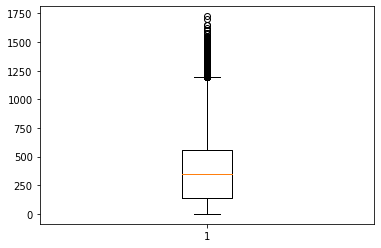

In [18]:
# вывод инфрмации по столбцу таблицы
col_info_num(df_internet, 'mb_used')

##### Выводы
* Тип данных: float64, лучше int
* Артефакты: не обнаружены
* Пропуски: нет
* Стиль значений: в хорошем стиле

**Рекомедации к обработке: так как общая сумма трафика за месяц округляется в бо́льшую сторону, то сделаем это вместе с изменением типа данных.**

#### session_date — дата интернет-сессии

In [19]:
# вывод инфрмации по столбцу таблицы
col_info_not_num(df_internet, 'session_date')

Тип данных session_date


dtype('O')

Уникальных значений и количество их упоминаний в столбце session_date


2018-12-31    1057
2018-12-30     903
2018-12-25     859
2018-12-26     844
2018-12-22     834
              ... 
2018-01-05      14
2018-01-04       9
2018-01-03       6
2018-01-01       3
2018-01-02       3
Name: session_date, Length: 365, dtype: int64

Cлучайные 10 строк


,Unnamed: 0,id,mb_used,session_date,user_id
92940,92940,1314_294,122.98,2018-04-09,1314
111308,111308,1378_101,321.80,2018-07-07,1378
15961,15961,1055_419,71.44,2018-08-01,1055
116929,116929,1393_415,553.85,2018-06-09,1393
73848,73848,1249_7,973.58,2018-10-08,1249
5492,5492,1015_500,707.45,2018-05-19,1015
12969,12969,1045_145,0.00,2018-08-19,1045
86538,86538,1292_654,0.00,2018-02-24,1292
111160,111160,1377_44,415.32,2018-08-12,1377
145056,145056,1483_435,491.30,2018-04-16,1483


Отсутствующие значения session_date


0

Доли отсутствующих значений с округлением session_date


0.0

##### Выводы
* Тип данных: object не соответствует смыслу, необходим datetime
* Артефакты: не обнаружены
* Пропуски: нет
* Стиль значений: в хорошем стиле

**Рекомедации к обработке: Тип данных: object в datetime**

#### user_id — идентификатор пользователя

Тип данных user_id


dtype('int64')

Уникальных значений и количество их упоминаний в столбце user_id


1496    834
1227    812
1204    789
1240    764
1251    759
       ... 
1151     35
1467     27
1343     26
1192     22
1399      8
Name: user_id, Length: 497, dtype: int64

Максимальные значения столбца user_id


,Unnamed: 0,id,mb_used,session_date,user_id
149239,149239,1499_0,186.94,2018-10-27,1499
149240,149240,1499_1,456.41,2018-12-12,1499
149241,149241,1499_2,0.00,2018-12-10,1499
149242,149242,1499_3,109.86,2018-10-12,1499
149243,149243,1499_4,202.73,2018-12-21,1499
149244,149244,1499_5,227.09,2018-10-05,1499
149245,149245,1499_6,441.51,2018-11-01,1499
149246,149246,1499_7,113.17,2018-11-01,1499
149247,149247,1499_8,239.80,2018-10-16,1499
149248,149248,1499_9,0.00,2018-11-17,1499


Cлучайные 10 строк


,Unnamed: 0,id,mb_used,session_date,user_id
31690,31690,1110_284,291.14,2018-12-19,1110
33679,33679,1118_296,559.18,2018-11-12,1118
103469,103469,1348_127,373.06,2018-11-07,1348
128386,128386,1429_544,586.47,2018-09-18,1429
141149,141149,1474_0,972.23,2018-11-23,1474
55041,55041,1185_163,217.84,2018-10-31,1185
24727,24727,1085_96,948.88,2018-12-14,1085
27352,27352,1094_214,258.08,2018-08-27,1094
58398,58398,1197_33,537.12,2018-09-20,1197
17722,17722,1061_111,147.59,2018-11-06,1061


Минимальные значения столбца user_id


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


Отрицательные значения столбца user_id


0

Отсутствующие значения user_id


0

Доли отсутствующих значений с округлением user_id


0.0

Сводная информация по параметрам данных user_id


count    149396.000000
mean       1252.099842
std         144.050823
min        1000.000000
25%        1130.000000
50%        1251.000000
75%        1380.000000
max        1499.000000
Name: user_id, dtype: float64

График распределения данных user_id


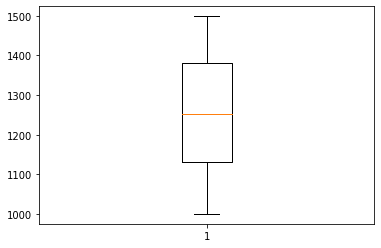

In [20]:
# вывод инфрмации по столбцу таблицы
col_info_num(df_internet, 'user_id')

##### Выводы
* Тип данных: int64 соответствует смыслу
* Артефакты: не обнаружено
* Пропуски: нет
* Стиль значений: в хорошем стиле

**Рекомедации к обработке: нет, данные в порядке**

#### Выводы по таблице internet (информация об интернет-сессиях)

Рекомендации к обработке:

* Unnamed, id	- удалить
* session_date - изменить тип данных object в datetime
* mb_used - округлить по месяцам, преобразовать в int

### Таблица messages (информация о сообщениях):

In [21]:
# чтение файлов с данными и сохранение в df_messages
df_messages = pd.read_csv('/datasets/messages.csv') 

In [22]:
# вывод общей инфрмации по таблице целиком
tab_info(df_messages, 'messages (информация о сообщениях)')

Первые строки таблицы messages (информация о сообщениях)


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


Cлучайные строки таблицы messages (информация о сообщениях)


,id,message_date,user_id
47642,1211_58,2018-11-22,1211
74566,1315_147,2018-12-31,1315
6145,1026_79,2018-12-17,1026
98751,1403_275,2018-09-08,1403
6710,1028_365,2018-12-28,1028
13268,1055_234,2018-10-28,1055
53750,1238_163,2018-11-12,1238
66652,1284_240,2018-11-10,1284
104531,1424_384,2018-12-19,1424
118762,1482_324,2018-05-08,1482


Последние строки таблицы messages (информация о сообщениях)


,id,message_date,user_id
123026,1499_174,2018-12-14,1499
123027,1499_175,2018-10-09,1499
123028,1499_176,2018-12-17,1499
123029,1499_177,2018-12-30,1499
123030,1499_178,2018-10-25,1499
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499
123035,1499_183,2018-11-16,1499


Сводная информация по параметрам данных messages (информация о сообщениях)


,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


Количество отсутствующих значений messages (информация о сообщениях)


id              0
message_date    0
user_id         0
dtype: int64

Доли отсутствующих значений с округлением messages (информация о сообщениях)


id              0.0
message_date    0.0
user_id         0.0
dtype: float64

Задублированных записей messages (информация о сообщениях)


0

Общая информация о данных в таблице messages (информация о сообщениях)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


None

Таблица messages (информация о сообщениях):

* id — уникальный номер сообщения
* message_date — дата сообщения
* user_id — идентификатор пользователя, отправившего сообщение

---
Итак, в таблице 3 столбца и 123 036 строк. Названия столбцов составлены в хорошем стиле. Тип данных в столбцах — int64(1), object(2). Рассмотрим каждый столбец в отдельности.

#### id — уникальный номер сообщения

In [23]:
# вывод инфрмации по столбцу таблицы
col_info_not_num(df_messages, 'id')

Тип данных id


dtype('O')

Уникальных значений и количество их упоминаний в столбце id


1089_251    1
1076_354    1
1247_82     1
1065_80     1
1484_182    1
           ..
1265_189    1
1030_433    1
1318_363    1
1039_780    1
1142_204    1
Name: id, Length: 123036, dtype: int64

Cлучайные 10 строк


,id,message_date,user_id
102798,1419_87,2018-12-11,1419
48905,1217_180,2018-10-06,1217
116022,1472_326,2018-08-24,1472
6040,1025_274,2018-04-29,1025
12612,1054_168,2018-06-14,1054
74157,1314_8,2018-08-21,1314
31560,1142_79,2018-08-28,1142
51700,1231_321,2018-06-05,1231
80445,1335_357,2018-07-18,1335
73357,1310_226,2018-08-24,1310


Отсутствующие значения id


0

Доли отсутствующих значений с округлением id


0.0

##### Выводы
* Тип данных: object не соответствует смыслу
* Артефакты: нет
* Пропуски: нет
* Стиль значений: не соответствует

**Рекомедации к обработке: id все уникальны, это технический параметр и вряд ли будет использоваться в исследовании. Проигнорируем этот столбец**

#### message_date — дата сообщения

In [24]:
# вывод инфрмации по столбцу таблицы
col_info_not_num(df_messages, 'message_date')

Тип данных message_date


dtype('O')

Уникальных значений и количество их упоминаний в столбце message_date


2018-12-31    859
2018-12-30    765
2018-12-21    712
2018-12-29    702
2018-12-28    699
             ... 
2018-01-11     12
2018-01-02     10
2018-01-04     10
2018-01-05     10
2018-01-03      4
Name: message_date, Length: 364, dtype: int64

Cлучайные 10 строк


,id,message_date,user_id
58082,1256_166,2018-10-30,1256
56418,1250_242,2018-09-07,1250
17250,1076_399,2018-04-17,1076
38179,1166_5,2018-11-06,1166
45601,1196_1051,2018-10-12,1196
17085,1076_234,2018-07-12,1076
103400,1421_363,2018-12-19,1421
57042,1251_506,2018-10-29,1251
94013,1385_722,2018-12-13,1385
82031,1344_95,2018-04-24,1344


Отсутствующие значения message_date


0

Доли отсутствующих значений с округлением message_date


0.0

##### Выводы
* Тип данных: object не соответствует смыслу, необходим datetime
* Артефакты: не обнаружены
* Пропуски: нет
* Стиль значений: в хорошем стиле

**Рекомедации к обработке: Тип данных: object в datetime**

#### user_id — идентификатор пользователя, отправившего сообщение

Тип данных user_id


dtype('int64')

Уникальных значений и количество их упоминаний в столбце user_id


1277    1463
1089    1408
1231    1384
1385    1380
1356    1224
        ... 
1389       6
1279       5
1074       3
1159       2
1141       1
Name: user_id, Length: 426, dtype: int64

Максимальные значения столбца user_id


,id,message_date,user_id
122852,1499_0,2018-10-26,1499
122853,1499_1,2018-12-23,1499
122854,1499_2,2018-12-04,1499
122855,1499_3,2018-11-05,1499
122856,1499_4,2018-12-19,1499
122857,1499_5,2018-12-19,1499
122858,1499_6,2018-12-13,1499
122859,1499_7,2018-10-03,1499
122860,1499_8,2018-11-22,1499
122861,1499_9,2018-12-10,1499


Cлучайные 10 строк


,id,message_date,user_id
121546,1491_345,2018-08-23,1491
24171,1099_378,2018-05-12,1099
7938,1032_109,2018-08-10,1032
38873,1167_179,2018-10-21,1167
83694,1348_15,2018-11-09,1348
37882,1165_236,2018-10-24,1165
36665,1158_470,2018-12-22,1158
76778,1324_461,2018-12-17,1324
27927,1121_54,2018-05-05,1121
119919,1484_440,2018-12-11,1484


Минимальные значения столбца user_id


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


Отрицательные значения столбца user_id


0

Отсутствующие значения user_id


0

Доли отсутствующих значений с округлением user_id


0.0

Сводная информация по параметрам данных user_id


count    123036.000000
mean       1256.989410
std         143.523967
min        1000.000000
25%        1134.000000
50%        1271.000000
75%        1381.000000
max        1499.000000
Name: user_id, dtype: float64

График распределения данных user_id


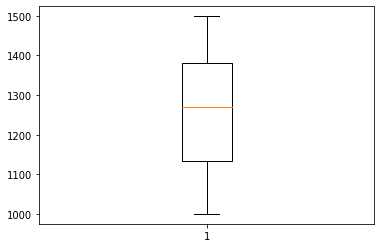

In [25]:
# вывод инфрмации по столбцу таблицы
col_info_num(df_messages, 'user_id')

##### Выводы
* Тип данных: int64 соответствует смыслу
* Артефакты: не обнаружено
* Пропуски: нет
* Стиль значений: в хорошем стиле

**Рекомедации к обработке: нет, данные в порядке**

#### Выводы по таблице messages (информация о сообщениях)

Рекомендации к обработке:

* id - удалить
* message_date - изменить тип данных object в datetime

### Таблица calls (информация о звонках):

In [26]:
# чтение файлов с данными и сохранение в df_calls
df_calls = pd.read_csv('/datasets/calls.csv') 

In [27]:
# вывод общей инфрмации по таблице целиком
tab_info(df_calls, 'calls (информация о звонках)')

Первые строки таблицы calls (информация о звонках)


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


Cлучайные строки таблицы calls (информация о звонках)


,id,call_date,duration,user_id
162849,1401_284,2018-05-31,4.97,1401
37376,1093_654,2018-10-18,0.00,1093
34849,1086_398,2018-12-08,10.13,1086
72481,1181_16,2018-12-06,15.98,1181
36919,1093_197,2018-07-17,4.47,1093
185887,1459_24,2018-10-27,4.77,1459
55638,1142_282,2018-06-19,16.18,1142
138044,1352_768,2018-09-29,0.00,1352
158805,1393_57,2018-04-14,8.19,1393
191148,1470_107,2018-12-29,10.11,1470


Последние строки таблицы calls (информация о звонках)


,id,call_date,duration,user_id
202597,1499_210,2018-10-02,8.86,1499
202598,1499_211,2018-12-29,4.58,1499
202599,1499_212,2018-12-30,1.35,1499
202600,1499_213,2018-10-17,10.77,1499
202601,1499_214,2018-12-05,2.42,1499
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499
202606,1499_219,2018-12-14,19.62,1499


Сводная информация по параметрам данных calls (информация о звонках)


,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


Количество отсутствующих значений calls (информация о звонках)


id           0
call_date    0
duration     0
user_id      0
dtype: int64

Доли отсутствующих значений с округлением calls (информация о звонках)


id           0.0
call_date    0.0
duration     0.0
user_id      0.0
dtype: float64

Задублированных записей calls (информация о звонках)


0

Общая информация о данных в таблице calls (информация о звонках)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


None

Таблица calls (информация о звонках):

* id — уникальный номер звонка
* call_date — дата звонка
* duration — длительность звонка в минутах
* user_id — идентификатор пользователя, сделавшего звонок

---
Итак, в таблице 4 столбца и 202 607 строк. Названия столбцов составлены в хорошем стиле. Тип данных в столбцах — float64(1), int64(1), object(2). Рассмотрим каждый столбец в отдельности.

#### id — уникальный номер звонка

In [28]:
# вывод инфрмации по столбцу таблицы
col_info_not_num(df_calls, 'id')

Тип данных id


dtype('O')

Уникальных значений и количество их упоминаний в столбце id


1453_487    1
1005_88     1
1097_27     1
1310_628    1
1291_71     1
           ..
1063_612    1
1348_114    1
1228_575    1
1133_54     1
1356_981    1
Name: id, Length: 202607, dtype: int64

Cлучайные 10 строк


,id,call_date,duration,user_id
50883,1126_446,2018-04-13,11.18,1126
197327,1483_276,2018-07-16,7.59,1483
123568,1318_567,2018-05-03,0.00,1318
17418,1048_208,2018-12-06,7.34,1048
33812,1083_157,2018-11-07,3.05,1083
44951,1113_367,2018-02-20,8.91,1113
33509,1081_754,2018-04-19,9.52,1081
10577,1027_447,2018-08-13,0.00,1027
48879,1122_24,2018-11-11,12.35,1122
156901,1388_61,2018-10-29,13.24,1388


Отсутствующие значения id


0

Доли отсутствующих значений с округлением id


0.0

##### Выводы
* Тип данных: object не соответствует смыслу
* Артефакты: нет
* Пропуски: нет
* Стиль значений: не соответствует

**Рекомедации к обработке: id все уникальны, это технический параметр и вряд ли будет использоваться в исследовании. Проигнорируем этот столбец**

#### call_date — дата звонка

In [29]:
# вывод инфрмации по столбцу таблицы
col_info_not_num(df_calls, 'call_date')

Тип данных call_date


dtype('O')

Уникальных значений и количество их упоминаний в столбце call_date


2018-12-31    1435
2018-12-29    1202
2018-12-30    1192
2018-12-22    1158
2018-12-26    1149
              ... 
2018-01-05      20
2018-01-07      18
2018-01-02       9
2018-01-03       7
2018-01-01       5
Name: call_date, Length: 365, dtype: int64

Cлучайные 10 строк


,id,call_date,duration,user_id
158938,1393_190,2018-10-14,0.00,1393
100481,1256_134,2018-10-05,14.85,1256
70791,1176_571,2018-05-14,2.91,1176
141369,1359_328,2018-10-16,2.62,1359
28181,1070_56,2018-11-21,11.53,1070
16932,1046_294,2018-12-15,20.68,1046
38608,1096_372,2018-10-13,5.99,1096
56481,1143_545,2018-07-02,9.04,1143
109694,1282_588,2018-04-13,6.42,1282
66467,1168_1618,2018-11-07,5.71,1168


Отсутствующие значения call_date


0

Доли отсутствующих значений с округлением call_date


0.0

##### Выводы
* Тип данных: object не соответствует смыслу, необходим datetime
* Артефакты: не обнаружены
* Пропуски: нет
* Стиль значений: в хорошем стиле

**Рекомедации к обработке: Тип данных: object в datetime**

#### duration — длительность звонка в минутах

Тип данных duration


dtype('float64')

Уникальных значений и количество их упоминаний в столбце duration


0.00     39613
4.49       142
5.50       142
6.15       141
6.38       141
         ...  
27.02        1
26.19        1
25.34        1
27.13        1
24.28        1
Name: duration, Length: 2871, dtype: int64

Максимальные значения столбца duration


,id,call_date,duration,user_id
95088,1241_44,2018-09-06,38.00,1241
178737,1446_22,2018-11-07,37.35,1446
5865,1017_61,2018-11-13,36.47,1017
39777,1099_150,2018-08-14,36.12,1099
60889,1153_135,2018-11-16,35.95,1153
60747,1152_444,2018-06-25,35.13,1152
100841,1260_5,2018-12-28,34.53,1260
73168,1184_142,2018-09-26,34.52,1184
81767,1203_340,2018-06-05,34.46,1203
64283,1165_31,2018-11-16,34.25,1165


Cлучайные 10 строк


,id,call_date,duration,user_id
111389,1285_317,2018-12-09,0.00,1285
96828,1247_151,2018-07-08,14.18,1247
61430,1155_238,2018-11-09,8.48,1155
178910,1446_195,2018-11-10,0.10,1446
74080,1185_874,2018-06-13,0.00,1185
181648,1453_840,2018-10-19,2.35,1453
102555,1263_432,2018-07-27,11.44,1263
134834,1344_651,2018-11-28,0.00,1344
94392,1239_361,2018-06-29,9.19,1239
31144,1078_488,2018-06-26,10.27,1078


Минимальные значения столбца duration


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.0,1000
1,1000_1,2018-08-17,0.0,1000
5,1000_5,2018-11-02,0.0,1000
6,1000_6,2018-10-18,0.0,1000
9,1000_9,2018-08-15,0.0,1000
36,1000_36,2018-10-09,0.0,1000
38,1000_38,2018-05-25,0.0,1000
39,1000_39,2018-06-13,0.0,1000
40,1000_40,2018-10-25,0.0,1000
47,1000_47,2018-07-14,0.0,1000


Отрицательные значения столбца duration


0

Отсутствующие значения duration


0

Доли отсутствующих значений с округлением duration


0.0

Сводная информация по параметрам данных duration


count    202607.000000
mean          6.755887
std           5.843365
min           0.000000
25%           1.300000
50%           6.000000
75%          10.700000
max          38.000000
Name: duration, dtype: float64

График распределения данных duration


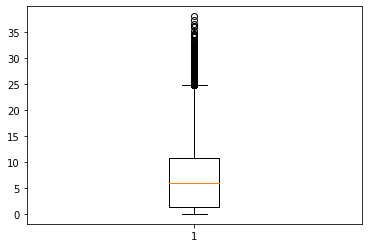

In [30]:
# вывод инфрмации по столбцу таблицы
col_info_num(df_calls, 'duration')

##### Выводы
* Тип данных: float64, лучше int
* Артефакты: не обнаружены
* Пропуски: нет
* Стиль значений: в хорошем стиле

**Рекомедации к обработке: так как всегда округляют секунды до минут, то сделаем это вместе с изменением типа данных. 0 в длительности звонков, это не принятый вызов, оставим так же.**

#### user_id — идентификатор пользователя, сделавшего звонок

Тип данных user_id


dtype('int64')

Уникальных значений и количество их упоминаний в столбце user_id


1377    1760
1168    1692
1375    1560
1453    1440
1196    1240
        ... 
1397      33
1442      28
1373      24
1016      20
1257      14
Name: user_id, Length: 492, dtype: int64

Максимальные значения столбца user_id


,id,call_date,duration,user_id
202387,1499_0,2018-12-09,0.00,1499
202388,1499_1,2018-10-03,0.00,1499
202389,1499_2,2018-11-19,12.50,1499
202390,1499_3,2018-11-27,9.65,1499
202391,1499_4,2018-11-17,17.55,1499
202392,1499_5,2018-12-28,0.00,1499
202393,1499_6,2018-11-19,0.58,1499
202394,1499_7,2018-12-27,5.40,1499
202395,1499_8,2018-11-22,0.00,1499
202396,1499_9,2018-10-22,2.41,1499


Cлучайные 10 строк


,id,call_date,duration,user_id
13122,1034_61,2018-11-01,15.46,1034
125657,1323_180,2018-09-20,12.70,1323
200128,1492_439,2018-07-16,0.00,1492
4555,1012_29,2018-05-10,9.29,1012
299,1000_299,2018-08-10,15.59,1000
175118,1433_17,2018-10-05,0.00,1433
92146,1228_558,2018-07-26,0.69,1228
30881,1078_225,2018-11-14,0.00,1078
72872,1183_236,2018-09-16,20.22,1183
57414,1145_245,2018-10-04,22.34,1145


Минимальные значения столбца user_id


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


Отрицательные значения столбца user_id


0

Отсутствующие значения user_id


0

Доли отсутствующих значений с округлением user_id


0.0

Сводная информация по параметрам данных user_id


count    202607.000000
mean       1253.940619
std         144.722751
min        1000.000000
25%        1126.000000
50%        1260.000000
75%        1379.000000
max        1499.000000
Name: user_id, dtype: float64

График распределения данных user_id


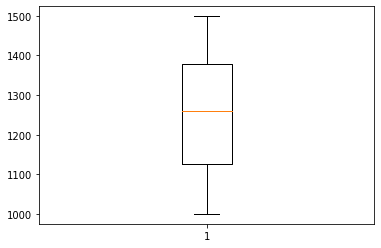

In [31]:
# вывод инфрмации по столбцу таблицы
col_info_num(df_calls, 'user_id')

##### Выводы
* Тип данных: int64 соответствует смыслу
* Артефакты: не обнаружено
* Пропуски: нет
* Стиль значений: в хорошем стиле

**Рекомедации к обработке: нет, данные в порядке**

#### Выводы по таблице calls (информация о звонках)

Рекомендации к обработке:

* call_date - изменить тип данных object в datetime
* duration - округлить до целых, преобразовать в int

### Таблица tariffs (информация о тарифах):

In [32]:
# чтение файлов с данными и сохранение в df_tariffs
df_tariffs = pd.read_csv('/datasets/tariffs.csv') 

In [33]:
# вывод общей инфрмации по таблице целиком
tab_info(df_tariffs, 'tariffs (информация о тарифах)')

Первые строки таблицы tariffs (информация о тарифах)


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Cлучайные строки таблицы tariffs (информация о тарифах)


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
1,1000,30720,3000,1950,150,1,1,ultra
0,50,15360,500,550,200,3,3,smart


Последние строки таблицы tariffs (информация о тарифах)


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Сводная информация по параметрам данных tariffs (информация о тарифах)


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
std,671.751442,10861.160159,1767.766953,989.949494,35.355339,1.414214,1.414214
min,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000
25%,287.500000,19200.000000,1125.000000,900.000000,162.500000,1.500000,1.500000
50%,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
75%,762.500000,26880.000000,2375.000000,1600.000000,187.500000,2.500000,2.500000
max,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000


Количество отсутствующих значений tariffs (информация о тарифах)


messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
tariff_name              0
dtype: int64

Доли отсутствующих значений с округлением tariffs (информация о тарифах)


messages_included        0.0
mb_per_month_included    0.0
minutes_included         0.0
rub_monthly_fee          0.0
rub_per_gb               0.0
rub_per_message          0.0
rub_per_minute           0.0
tariff_name              0.0
dtype: float64

Задублированных записей tariffs (информация о тарифах)


0

Общая информация о данных в таблице tariffs (информация о тарифах)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


None

Таблица tariffs (информация о тарифах):

* messages_included — количество сообщений в месяц, включённых в абонентскую плату
* mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
* minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
* rub_monthly_fee — ежемесячная абонентская плата в рублях
* rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)
* rub_per_message — стоимость отправки сообщения сверх тарифного пакета
* rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
* tariff_name — название тарифа

---
Итак, в таблице 8 столбца и 2 строки. Названия столбцов составлены в хорошем стиле. Тип данных в столбцах — int64(7), object(1). Нет смысла рассматривать каждый столбец в отдельности. Столбец mb_per_month_included будет не удобен в расчетах, так как цена переплаты указаны в гигабайтах rub_per_gb. Пересчитать и переименовать столбец.

#### Выводы
* Тип данных: все столбцы соответствуют смыслу
* Артефакты: не обнаружено
* Пропуски: нет
* Стиль значений: в хорошем стиле

**Рекомедации к обработке: mb_per_month_included пересчитать**

### Выводы по всем таблицам

users (информация о пользователях)
Рекомендации к обработке:
* churn_date, reg_date - изменить тип данных object в datetime
* city, first_name, last_name	- привести к нижнему регистру

internet (информация об интернет-сессиях)
Рекомендации к обработке:
* Unnamed, id	- оставить
* session_date - изменить тип данных object в datetime
* mb_used - округлить по месяцам, преобразовать в int

messages (информация о сообщениях)
Рекомендации к обработке:
* id - оставить
* message_date - изменить тип данных object в datetime

calls (информация о звонках)
Рекомендации к обработке:
* id - оставить
* call_date - изменить тип данных object в datetime
* duration - округлить до целых, преобразовать в int

tariffs (информация о тарифах):
* не требуют обработки

## Предобработка данных

### Таблица user_id — уникальный идентификатор пользователя

Начнем с таблицы user_id

In [34]:
# посмотрим начальный вариант
df_users

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


In [35]:
# приведем к нижнему регистру
df_users['city'] = df_users['city'].str.lower()
df_users['first_name'] = df_users['first_name'].str.lower()
df_users['last_name'] = df_users['last_name'].str.lower()

In [36]:
# изменим  тип столбца в datetime
df_users['churn_date'] = df_users['churn_date'].astype('datetime64[M]')
# оставим только номер месяца
df_users['churn_date'] = pd.DatetimeIndex(df_users['churn_date']).month
# изменим  тип столбца в целочисленный
df_users = df_users.astype( {"churn_date": "Int64"})
# изменим  тип столбца в datetime
df_users['reg_date'] = df_users['reg_date'].astype('datetime64[M]')
# оставим только номер месяца
df_users['reg_date'] = pd.DatetimeIndex(df_users['reg_date']).month
# переименнуем название столбца
df_users = df_users.rename(columns={'churn_date': 'churn_month', 'reg_date': 'reg_month'})
# посмотрим результат
display(df_users)
display(df_users.info())

,user_id,age,churn_month,city,first_name,last_name,reg_month,tariff
0,1000,52,NaN,краснодар,рафаил,верещагин,5,ultra
1,1001,41,NaN,москва,иван,ежов,11,smart
2,1002,59,NaN,стерлитамак,евгений,абрамович,6,smart
3,1003,23,NaN,москва,белла,белякова,8,ultra
4,1004,68,NaN,новокузнецк,татьяна,авдеенко,5,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,иркутск,авксентий,фокин,8,ultra
496,1496,36,NaN,вологда,трифон,блохин,1,smart
497,1497,32,NaN,челябинск,каролина,агеева,10,smart
498,1498,68,10,владикавказ,всеволод,акимчин,7,smart


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id        500 non-null int64
age            500 non-null int64
churn_month    38 non-null Int64
city           500 non-null object
first_name     500 non-null object
last_name      500 non-null object
reg_month      500 non-null int64
tariff         500 non-null object
dtypes: Int64(1), int64(3), object(4)
memory usage: 31.9+ KB


None

---
Данные в таблице user_id — уникальный идентификатор пользователя, готовы к дальнейшей обработке.

### Таблица calls (информация о звонках):

In [37]:
# посмотрим начальный вариант
df_calls

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


In [38]:
# округлим до целых минут длительность вызова, так как
# даже если он длился всего 1 секунду, будет засчитан как 1 минута, преобразум в int
df_calls['duration'] = np.ceil(df_calls['duration']).astype(int)

In [39]:
# изменим  тип столбца в datetime
df_calls['call_date'] = df_calls['call_date'].astype('datetime64[M]')
# оставим только номер месяца
df_calls['call_date'] = pd.DatetimeIndex(df_calls['call_date']).month
# переименнуем название столбца
df_calls = df_calls.rename(columns={'call_date': 'month'})
# посмотрим результат
display(df_calls)
display(df_calls.info())

,id,month,duration,user_id
0,1000_0,7,0,1000
1,1000_1,8,0,1000
2,1000_2,6,3,1000
3,1000_3,9,14,1000
4,1000_4,12,6,1000
...,...,...,...,...
202602,1499_215,12,1,1499
202603,1499_216,10,19,1499
202604,1499_217,11,11,1499
202605,1499_218,10,5,1499


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id          202607 non-null object
month       202607 non-null int64
duration    202607 non-null int64
user_id     202607 non-null int64
dtypes: int64(3), object(1)
memory usage: 6.2+ MB


None

---
Данные в таблице calls (информация о звонках), готовы к дальнейшей обработке.

### Таблица internet (информация об интернет-сессиях)

In [40]:
# посмотрим начальный вариант
df_internet

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499


In [41]:
# изменим  тип столбца в datetime
df_internet['session_date'] = df_internet['session_date'].astype('datetime64[M]')
# оставим только номер месяца
df_internet['session_date'] = pd.DatetimeIndex(df_internet['session_date']).month
# переименнуем название столбца
df_internet = df_internet.rename(columns={'session_date': 'month'})
# посмотрим результат
display(df_internet)
display(df_internet.info())

,Unnamed: 0,id,mb_used,month,user_id
0,0,1000_0,112.95,11,1000
1,1,1000_1,1052.81,9,1000
2,2,1000_2,1197.26,6,1000
3,3,1000_3,550.27,8,1000
4,4,1000_4,302.56,9,1000
...,...,...,...,...,...
149391,149391,1499_152,318.90,10,1499
149392,149392,1499_153,490.13,12,1499
149393,149393,1499_154,0.00,10,1499
149394,149394,1499_155,1246.32,11,1499


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0    149396 non-null int64
id            149396 non-null object
mb_used       149396 non-null float64
month         149396 non-null int64
user_id       149396 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 5.7+ MB


None

---
Данные в таблице internet (информация об интернет-сессиях), на данном этапе, готовы к дальнейшей обработке. Тип mb_used - преобразуем в int, после подсчета потребления по месяцам, так как общая сумма за месяц округляется в бо́льшую сторону.

### Таблица messages (информация о сообщениях)

In [42]:
# посмотрим начальный вариант
df_messages

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


In [43]:
# изменим  тип столбца в datetime
df_messages['message_date'] = df_messages['message_date'].astype('datetime64[M]')
# оставим только номер месяца
df_messages['message_date'] = pd.DatetimeIndex(df_messages['message_date']).month
# переименнуем название столбца
df_messages = df_messages.rename(columns={'message_date': 'month'})
# посмотрим результат
display(df_messages)
display(df_messages.info())

,id,month,user_id
0,1000_0,6,1000
1,1000_1,10,1000
2,1000_2,8,1000
3,1000_3,6,1000
4,1000_4,12,1000
...,...,...,...
123031,1499_179,12,1499
123032,1499_180,9,1499
123033,1499_181,9,1499
123034,1499_182,11,1499


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id         123036 non-null object
month      123036 non-null int64
user_id    123036 non-null int64
dtypes: int64(2), object(1)
memory usage: 2.8+ MB


None

---
Данные в таблице messages (информация о сообщениях), готовы к дальнейшей обработке.

### Таблица tariffs (информация о тарифах):

In [44]:
# посмотрим начальный вариант
df_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [45]:
# пересчитаем в гигабайтах
df_tariffs['mb_per_month_included'] = (df_tariffs['mb_per_month_included'] / 1024).astype(int)
# переименнуем название столбца
df_tariffs = df_tariffs.rename(columns={'tariff_name': 'tariff', 'mb_per_month_included': 'gb_per_month_included'})
# посмотрим результат
display(df_tariffs)
display(df_tariffs.info())

,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15,500,550,200,3,3,smart
1,1000,30,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
gb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff                   2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


None

---
Данные в таблице tariffs (информация о тарифах), готовы к дальнейшей обработке.

## Обработка по месяцам

### calls (информация о звонках) по месяцам

In [46]:
# посмотрим начальный вариант
df_calls

,id,month,duration,user_id
0,1000_0,7,0,1000
1,1000_1,8,0,1000
2,1000_2,6,3,1000
3,1000_3,9,14,1000
4,1000_4,12,6,1000
...,...,...,...,...
202602,1499_215,12,1,1499
202603,1499_216,10,19,1499
202604,1499_217,11,11,1499
202605,1499_218,10,5,1499


In [47]:
# сгруппируем по уникальному пользователю и месяцем, просумируем длительность и количество звонков
user_calls = df_calls.groupby(['user_id', 'month'])\
                  .agg({'duration':'sum', 'id':'count'})\
                  .reset_index()
# переименуем столбец
user_calls = user_calls.rename(columns={'id': 'calls'})
# посмотрим результат
display(user_calls)
display(user_calls.info())

,user_id,month,duration,calls
0,1000,5,159,22
1,1000,6,172,43
2,1000,7,340,47
3,1000,8,408,52
4,1000,9,466,58
...,...,...,...,...
3169,1498,10,247,41
3170,1499,9,70,9
3171,1499,10,449,68
3172,1499,11,612,74


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3174 entries, 0 to 3173
Data columns (total 4 columns):
user_id     3174 non-null int64
month       3174 non-null int64
duration    3174 non-null int64
calls       3174 non-null int64
dtypes: int64(4)
memory usage: 99.3 KB


None

---
Подготовили данные к дальнейшей обработке

### internet (информация об интернет-сессиях) по месяцам

In [48]:
# посмотрим начальный вариант
df_internet

,Unnamed: 0,id,mb_used,month,user_id
0,0,1000_0,112.95,11,1000
1,1,1000_1,1052.81,9,1000
2,2,1000_2,1197.26,6,1000
3,3,1000_3,550.27,8,1000
4,4,1000_4,302.56,9,1000
...,...,...,...,...,...
149391,149391,1499_152,318.90,10,1499
149392,149392,1499_153,490.13,12,1499
149393,149393,1499_154,0.00,10,1499
149394,149394,1499_155,1246.32,11,1499


In [49]:
# сгруппируем по уникальному пользователю и месяцем, просумируем траффик
user_internet = df_internet.groupby(['user_id', 'month'])\
                        .agg({'mb_used':'sum'})\
                        .reset_index()
# посмотрим результат
display(user_internet)
display(user_internet.info())

,user_id,month,mb_used
0,1000,5,2253.49
1,1000,6,23233.77
2,1000,7,14003.64
3,1000,8,14055.93
4,1000,9,14568.91
...,...,...,...
3198,1498,10,20579.36
3199,1499,9,1845.75
3200,1499,10,17788.51
3201,1499,11,17963.31


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203 entries, 0 to 3202
Data columns (total 3 columns):
user_id    3203 non-null int64
month      3203 non-null int64
mb_used    3203 non-null float64
dtypes: float64(1), int64(2)
memory usage: 75.2 KB


None

In [50]:
# переведем данные из мегабайтов в гигабайты / 1024
user_internet ['mb_used'] = user_internet ['mb_used']/1024
user_internet

,user_id,month,mb_used
0,1000,5,2.200674
1,1000,6,22.689229
2,1000,7,13.675430
3,1000,8,13.726494
4,1000,9,14.227451
...,...,...,...
3198,1498,10,20.097031
3199,1499,9,1.802490
3200,1499,10,17.371592
3201,1499,11,17.542295


In [51]:
# округлим до целых гигабайт, так как
# общая сумма за месяц округляется в бо́льшую сторону, преобразум в int, переименуем столбец
user_internet ['mb_used'] = np.ceil(user_internet ['mb_used']).astype(int)
user_internet = user_internet.rename(columns={'mb_used': 'gb_used'})
# посмотрим результат
display(user_internet)
display(user_internet.info())

,user_id,month,gb_used
0,1000,5,3
1,1000,6,23
2,1000,7,14
3,1000,8,14
4,1000,9,15
...,...,...,...
3198,1498,10,21
3199,1499,9,2
3200,1499,10,18
3201,1499,11,18


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203 entries, 0 to 3202
Data columns (total 3 columns):
user_id    3203 non-null int64
month      3203 non-null int64
gb_used    3203 non-null int64
dtypes: int64(3)
memory usage: 75.2 KB


None

---
Подготовили данные к дальнейшей обработке

---


### messages (информация о сообщениях) по месяцам

In [52]:
# посмотрим начальный вариант
df_messages

,id,month,user_id
0,1000_0,6,1000
1,1000_1,10,1000
2,1000_2,8,1000
3,1000_3,6,1000
4,1000_4,12,1000
...,...,...,...
123031,1499_179,12,1499
123032,1499_180,9,1499
123033,1499_181,9,1499
123034,1499_182,11,1499


In [53]:
# сгруппируем по уникальному пользователю и месяцем, просумируем траффик
user_messages = df_messages.groupby(['user_id', 'month'])\
                        .agg({'id':'count'})\
                        .reset_index()
# переименуем столбец
user_messages = user_messages.rename(columns={'id': 'messages'})                  
# посмотрим результат
display(user_messages)
display(user_messages.info())

,user_id,month,messages
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
...,...,...,...
2712,1498,10,42
2713,1499,9,11
2714,1499,10,48
2715,1499,11,59


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2717 entries, 0 to 2716
Data columns (total 3 columns):
user_id     2717 non-null int64
month       2717 non-null int64
messages    2717 non-null int64
dtypes: int64(3)
memory usage: 63.8 KB


None

---
Подготовили данные к дальнейшей обработке

### Сведем  полученные по месяцам данные 

Обьединим предобработанные таблицу в одну, назовем ее df.

In [54]:
# к данным о звонках присоединим данные о сообщениях, сохраним все варианты outer
df = user_calls.merge(user_messages, on=['user_id','month'], how='outer')
# к полеченному результату добавим данные о траффике, сохраним все варианты outer
df = df.merge(user_internet, on=['user_id','month'], how = 'outer')
#  к полеченному результату добавим данные пользователей
df = df.merge(df_users, on='user_id', how='left')
#  к полеченному результату добавим данные тарфиных планов
df = df.merge(df_tariffs, on='tariff', how='left')
# посмотрим результат
display(df)
display(df.info())

,user_id,month,duration,calls,messages,gb_used,age,churn_month,city,first_name,last_name,reg_month,tariff,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,159.0,22.0,22.0,3.0,52,NaN,краснодар,рафаил,верещагин,5,ultra,1000,30,3000,1950,150,1,1
1,1000,6,172.0,43.0,60.0,23.0,52,NaN,краснодар,рафаил,верещагин,5,ultra,1000,30,3000,1950,150,1,1
2,1000,7,340.0,47.0,75.0,14.0,52,NaN,краснодар,рафаил,верещагин,5,ultra,1000,30,3000,1950,150,1,1
3,1000,8,408.0,52.0,81.0,14.0,52,NaN,краснодар,рафаил,верещагин,5,ultra,1000,30,3000,1950,150,1,1
4,1000,9,466.0,58.0,57.0,15.0,52,NaN,краснодар,рафаил,верещагин,5,ultra,1000,30,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,9,NaN,NaN,32.0,17.0,35,NaN,санкт-петербург,павел,гончаров,8,smart,50,15,500,550,200,3,3
3210,1489,10,NaN,NaN,21.0,20.0,35,NaN,санкт-петербург,павел,гончаров,8,smart,50,15,500,550,200,3,3
3211,1489,11,NaN,NaN,20.0,18.0,35,NaN,санкт-петербург,павел,гончаров,8,smart,50,15,500,550,200,3,3
3212,1489,12,NaN,NaN,35.0,17.0,35,NaN,санкт-петербург,павел,гончаров,8,smart,50,15,500,550,200,3,3


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 20 columns):
user_id                  3214 non-null int64
month                    3214 non-null int64
duration                 3174 non-null float64
calls                    3174 non-null float64
messages                 2717 non-null float64
gb_used                  3203 non-null float64
age                      3214 non-null int64
churn_month              187 non-null Int64
city                     3214 non-null object
first_name               3214 non-null object
last_name                3214 non-null object
reg_month                3214 non-null int64
tariff                   3214 non-null object
messages_included        3214 non-null int64
gb_per_month_included    3214 non-null int64
minutes_included         3214 non-null int64
rub_monthly_fee          3214 non-null int64
rub_per_gb               3214 non-null int64
rub_per_message          3214 non-null int64
rub_per_minute           32

None

In [92]:
df.shape

(3214, 25)

In [93]:
df.user_id.nunique()

498

In [55]:
# заменим пропущенные значения (абонент не использовал услугу вообще) на 0
df['duration'] = df['duration'].fillna(0)
df['messages'] = df['messages'].fillna(0)
df['calls'] = df['calls'].fillna(0)
df['gb_used'] = df['gb_used'].fillna(0)

In [56]:
# изменим  тип столбцов в нужный методом astype()
df = df.astype({ "duration": "Int64", "calls": "Int64", "messages": "Int64", "gb_used": "Int64"})

In [57]:
# вычислим объем перерасхода от включенного в тариф по минутам
df['minutes_overrun'] = df ['duration'] - df ['minutes_included']
# вычислим объем перерасхода от включенного в тариф по сообщениям
df['messages_overrun'] = df['messages'] - df['messages_included']
# вычислим объем перерасхода от включенного в тариф по гигабайтам траффика
df['gb_used_overrun']  = df['gb_used'] - df['gb_per_month_included']

In [58]:
# заменим пропущенные значения в вычисленных перерасходах на 0, то есть перерасхода не было
df.loc[df['minutes_overrun'] < 0, 'minutes_overrun'] = 0
df.loc[df['messages_overrun'] < 0, 'messages_overrun'] = 0
df.loc[df['gb_used_overrun'] < 0, 'gb_used_overrun'] = 0

In [59]:
# вычислим выручку за перерасхода от включенного в тариф по минутам, сообщениям и гб траффика
df['revenue'] = df['minutes_overrun'] * df['rub_per_minute'] + df['messages_overrun'] * df['rub_per_message'] + df['gb_used_overrun'] * df['rub_per_gb']
# вычислим выручку всего по абоненту с учетом перерасхода
df['revenue_total'] = df['revenue'] + df['rub_monthly_fee']
# посмотрим результат
display(df)
display(df.info())

,user_id,month,duration,calls,messages,gb_used,age,churn_month,city,first_name,...,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,minutes_overrun,messages_overrun,gb_used_overrun,revenue,revenue_total
0,1000,5,159,22,22,3,52,NaN,краснодар,рафаил,...,3000,1950,150,1,1,0,0,0,0,1950
1,1000,6,172,43,60,23,52,NaN,краснодар,рафаил,...,3000,1950,150,1,1,0,0,0,0,1950
2,1000,7,340,47,75,14,52,NaN,краснодар,рафаил,...,3000,1950,150,1,1,0,0,0,0,1950
3,1000,8,408,52,81,14,52,NaN,краснодар,рафаил,...,3000,1950,150,1,1,0,0,0,0,1950
4,1000,9,466,58,57,15,52,NaN,краснодар,рафаил,...,3000,1950,150,1,1,0,0,0,0,1950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,9,0,0,32,17,35,NaN,санкт-петербург,павел,...,500,550,200,3,3,0,0,2,400,950
3210,1489,10,0,0,21,20,35,NaN,санкт-петербург,павел,...,500,550,200,3,3,0,0,5,1000,1550
3211,1489,11,0,0,20,18,35,NaN,санкт-петербург,павел,...,500,550,200,3,3,0,0,3,600,1150
3212,1489,12,0,0,35,17,35,NaN,санкт-петербург,павел,...,500,550,200,3,3,0,0,2,400,950


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 25 columns):
user_id                  3214 non-null int64
month                    3214 non-null int64
duration                 3214 non-null Int64
calls                    3214 non-null Int64
messages                 3214 non-null Int64
gb_used                  3214 non-null Int64
age                      3214 non-null int64
churn_month              187 non-null Int64
city                     3214 non-null object
first_name               3214 non-null object
last_name                3214 non-null object
reg_month                3214 non-null int64
tariff                   3214 non-null object
messages_included        3214 non-null int64
gb_per_month_included    3214 non-null int64
minutes_included         3214 non-null int64
rub_monthly_fee          3214 non-null int64
rub_per_gb               3214 non-null int64
rub_per_message          3214 non-null int64
rub_per_minute           3214 non-n

None

In [94]:
df['revenue_total'].describe()

count    3214.000000
mean     1529.076229
std       798.251091
min       550.000000
25%       750.000000
50%      1653.500000
75%      1950.000000
max      6770.000000
Name: revenue_total, dtype: float64

### Выводы обработки по месяцам

Итак, создали таблицу df из 25 колонок и 3214 строк, где следующее описание данных:

* user_id — уникальный идентификатор пользователя
* month — месяц года (2018)
* duration — длительность звонков в минутах в месяце
* calls — количество звонков в минутах в месяце
* messages — количество сообщений в минутах в месяце
* gb_used — количество гигабайт в минутах в месяце
* age — возраст пользователя (годы)
* churn_month — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
* city — город проживания пользователя
* first_name — имя пользователя
* last_name — фамилия пользователя
* reg_month — месяц подключения тарифа
* tariff — название тарифного плана
* messages_included — количество сообщений в месяц, включённых в абонентскую плату
* gb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в гигабайтах)
* minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
* rub_monthly_fee — ежемесячная абонентская плата в рублях
* rub_per_gb - стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета
* rub_per_message — стоимость отправки сообщения сверх тарифного пакета
* rub_per_minute - стоимость минуты разговора сверх тарифного пакета
* minutes_overrun - объем перерасхода от включенного в тариф по минутам
* messages_overrun - объем перерасхода от включенного в тариф по сообщениям
* gb_used_overrun - объем перерасхода от включенного в тариф по гигабайтам траффика
* revenue - выручка за перерасход от включенного в тариф по минутам, сообщениям и гб траффика по месяцу
* revenue_total - выручка всего по абоненту с учетом перерасхода по месяцу

## Анализ и описание данных

Посчитаем сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц. Посчитайем среднее количество, дисперсию и стандартное отклонение. Постройем гистограммы.

In [60]:
# выделим все записи по тарифу в отдельную базу
df_smart = df.query('tariff == "smart"')
# посмотрим результат
df_smart

,user_id,month,duration,calls,messages,gb_used,age,churn_month,city,first_name,...,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,minutes_overrun,messages_overrun,gb_used_overrun,revenue,revenue_total
8,1001,11,430,59,0,18,41,NaN,москва,иван,...,500,550,200,3,3,0,0,3,600,1150
9,1001,12,414,63,0,14,41,NaN,москва,иван,...,500,550,200,3,3,0,0,0,0,550
10,1002,6,117,15,4,11,59,NaN,стерлитамак,евгений,...,500,550,200,3,3,0,0,0,0,550
11,1002,7,214,26,11,18,59,NaN,стерлитамак,евгений,...,500,550,200,3,3,0,0,3,600,1150
12,1002,8,289,42,13,20,59,NaN,стерлитамак,евгений,...,500,550,200,3,3,0,0,5,1000,1550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3208,1489,8,0,0,17,11,35,NaN,санкт-петербург,павел,...,500,550,200,3,3,0,0,0,0,550
3209,1489,9,0,0,32,17,35,NaN,санкт-петербург,павел,...,500,550,200,3,3,0,0,2,400,950
3210,1489,10,0,0,21,20,35,NaN,санкт-петербург,павел,...,500,550,200,3,3,0,0,5,1000,1550
3211,1489,11,0,0,20,18,35,NaN,санкт-петербург,павел,...,500,550,200,3,3,0,0,3,600,1150


In [61]:
# выделим все записи по тарифу в отдельную базу
df_ultra = df.query('tariff == "ultra"')
# посмотрим результат
df_ultra

,user_id,month,duration,calls,messages,gb_used,age,churn_month,city,first_name,...,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,minutes_overrun,messages_overrun,gb_used_overrun,revenue,revenue_total
0,1000,5,159,22,22,3,52,NaN,краснодар,рафаил,...,3000,1950,150,1,1,0,0,0,0,1950
1,1000,6,172,43,60,23,52,NaN,краснодар,рафаил,...,3000,1950,150,1,1,0,0,0,0,1950
2,1000,7,340,47,75,14,52,NaN,краснодар,рафаил,...,3000,1950,150,1,1,0,0,0,0,1950
3,1000,8,408,52,81,14,52,NaN,краснодар,рафаил,...,3000,1950,150,1,1,0,0,0,0,1950
4,1000,9,466,58,57,15,52,NaN,краснодар,рафаил,...,3000,1950,150,1,1,0,0,0,0,1950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3204,1473,9,0,0,19,17,18,NaN,красноярск,николай,...,3000,1950,150,1,1,0,0,0,0,1950
3205,1473,10,0,0,20,14,18,NaN,красноярск,николай,...,3000,1950,150,1,1,0,0,0,0,1950
3206,1473,11,0,0,14,22,18,NaN,красноярск,николай,...,3000,1950,150,1,1,0,0,0,0,1950
3207,1473,12,0,0,20,18,18,NaN,красноярск,николай,...,3000,1950,150,1,1,0,0,0,0,1950


In [62]:
# анализ столбца методом подсчета уникальных значений и количества их упоминаний
df['tariff'].value_counts()

smart    2229
ultra     985
Name: tariff, dtype: int64

In [63]:
# анализ столбца методом подсчета уникальных значений и количества их упоминаний
df_smart['user_id'].value_counts()

1308    12
1433    12
1429    12
1135    12
1045    12
        ..
1297     1
1095     1
1194     1
1190     1
1141     1
Name: user_id, Length: 350, dtype: int64

In [64]:
# анализ столбца методом подсчета уникальных значений и количества их упоминаний
df_ultra['user_id'].value_counts()

1375    12
1453    12
1381    12
1168    12
1385    12
        ..
1349     1
1336     1
1485     1
1234     1
1192     1
Name: user_id, Length: 148, dtype: int64

---

**Выводы**

* по тарифу smart - 2229 записей, ultra - 985. 
* уникальных пользователей smart - 350, ultra - 148. Изначально было 500, скорее всего 2 пользователя есть в начальных данных, но потребления услуг за год по ним не было.

Таким образом, 70 % пользователей smart в выборке, и 30%  ultra. 498 уникальных пользователей.

### duration (длительность вызовов)

In [65]:
# сравним данные по тарифам
df_pivot_duration = df.pivot_table(index= 'tariff', values= 'duration', aggfunc= ['sum', 'mean', 'median','std', 'count'])
# посмотрим результат
df_pivot_duration

,sum,mean,median,std,count
,duration,duration,duration,duration,duration
tariff,,,,,
smart,931577,417.934948,422,190.313730,2229
ultra,518724,526.623350,518,317.606098,985


In [95]:
df_pivot_duration.T

,tariff,smart,ultra
sum,duration,931577,518724
mean,duration,417.935,526.623
median,duration,422,518
std,duration,190.314,317.606
count,duration,2229,985


In [66]:
# сравним данные по тарифам по месяцам
df_pivot_duration_month = df.pivot_table(index= ['month', 'tariff'], values= 'duration', aggfunc= ['sum', 'mean', 'median','std', 'count'])
# посмотрим результат
df_pivot_duration_month

sum        mean   median         std    count
             duration    duration duration    duration duration
month tariff                                                   
1     smart      6931  203.852941    162.5  154.231454       34
      ultra      3853  428.111111    382.0  269.757968        9
2     smart     17324  298.689655    258.0  190.820041       58
      ultra      7131  297.125000    168.0  296.512528       24
3     smart     30034  390.051948    409.0  191.893604       77
      ultra     18117  489.648649    403.0  333.743765       37
4     smart     41119  367.133929    368.5  186.489161      112
      ultra     25191  458.018182    453.0  267.682405       55
5     smart     54618  387.361702    433.0  186.601343      141
      ultra     34192  510.328358    519.0  289.603511       67
6     smart     64885  395.640244    400.0  175.336587      164
      ultra     40295  479.702381    479.0  302.549081       84
7     smart     82079  408.353234    414.0  179.583601      201
      ultra     49667  545.791209    542.0  307.119322       91
8     smart     99045  421.468085    432.0  186.530382      235
      ultra     54653  510.775701    500.0  312.980026      107
9     smart    111439  428.611538    435.0  183.126576      260
      ultra     62036  539.443478    520.0  325.141162      115
10    smart    125284  426.136054    427.5  188.128510      294
      ultra     68644  558.081301    533.0  326.289110      123
11    smart    137544  435.265823    428.5  177.778618      316
      ultra     72545  541.380597    546.0  310.757232      134
12    smart    161275  478.560831    471.0  199.245131      337
      ultra     82400  592.805755    584.0  342.456321      139

'smart'

count    2229.000000
mean      417.934948
std       190.313730
min         0.000000
25%       282.000000
50%       422.000000
75%       545.000000
max      1435.000000
Name: duration, dtype: float64

'Дисперсия smart'

36219.31578434428

'ultra'

count     985.000000
mean      526.623350
std       317.606098
min         0.000000
25%       284.000000
50%       518.000000
75%       752.000000
max      1673.000000
Name: duration, dtype: float64

'Дисперсия ultra'

100873.63339730098

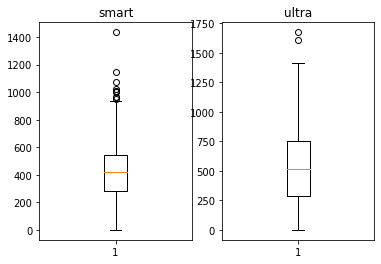

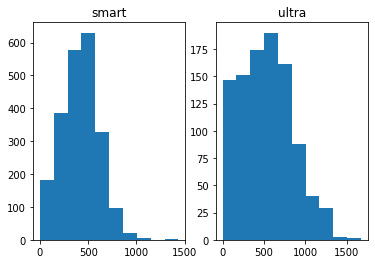

In [67]:
# получим cводную информацию по параметрам данных, расситаем дисперсию, построим графики
name = 'duration'
display('smart', df_smart[name].describe(), 'Дисперсия smart', np.var(df_smart[name]))
display('ultra', df_ultra[name].describe(), 'Дисперсия ultra', np.var(df_ultra[name]))
fig, axs = plt.subplots(1, 2)

axs[0].boxplot(df_smart[name])
axs[0].set_title('smart')
axs[1].boxplot(df_ultra[name])
axs[1].set_title('ultra');

fig, axs = plt.subplots(1, 2)

axs[0].hist(df_smart[name], bins=10)
axs[0].set_title('smart')
axs[1].hist(df_ultra[name], bins=10)
axs[1].set_title('ultra');

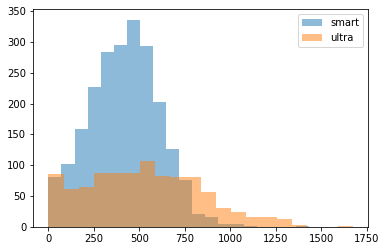

In [68]:
# сравним тарифы на гистограмме
x = [df_smart['duration']]
y = [df_ultra['duration']]

bins = 20

plt.hist(x, bins, alpha=0.5, label='smart')
plt.hist(y, bins, alpha=0.5, label='ultra')
plt.legend(loc='upper right')
plt.show()

---

**Выводы**

* по тарифу smart в среднем говорят 417 минут в месяц, что совпадает с медианой в 422 минуты.
* по тарифу ultra говорят в среднем больше почти на 100 минут - 518 минут в месяц.
* в смарте есть клиенты выговариющие больше 1000 минут, их видно на графике распределения в качестве выбросов.
* в обоих тарифах 75% пользователей говорят больше 280 минут в месяц.
* в ультре больше абонентов использющих более 800 минут в месяц, и в целом в ультре говорят дольше.
* в обоих тарифах большинство не используют больше 800 минут в месяц.
* нагрузка на звонки растет, если в январе медиана для смарт было 162 минуты, 269 для ультры, то в декабре в среднем говорили почти в 2,5 раза больше. И количество пользователей тоже вырастает в декабре.

### calls (количество звонков)

In [69]:
# сравним данные по тарифам
df_pivot_calls = df.pivot_table(index= 'tariff', values= 'calls', aggfunc= ['sum', 'mean', 'median','std', 'count'])
# посмотрим результат
df_pivot_calls

,sum,mean,median,std,count
,calls,calls,calls,calls,calls
tariff,,,,,
smart,130315,58.463437,60,25.939858,2229
ultra,72292,73.392893,74,43.916853,985


In [70]:
# сравним данные по тарифам по месяцам
df_pivot_calls_month = df.pivot_table(index= ['month', 'tariff'], values= 'calls', aggfunc= ['sum', 'mean', 'median','std', 'count'])
# посмотрим результат
df_pivot_calls_month

sum       mean median        std count
              calls      calls  calls      calls calls
month tariff                                          
1     smart     941  27.676471   20.5  20.811886    34
      ultra     535  59.444444   51.0  41.638657     9
2     smart    2331  40.189655   38.5  25.394057    58
      ultra     997  41.541667   25.0  40.971866    24
3     smart    4183  54.324675   59.0  25.536579    77
      ultra    2504  67.675676   57.0  44.838013    37
4     smart    5747  51.312500   52.0  25.704850   112
      ultra    3525  64.090909   61.0  36.271748    55
5     smart    7789  55.241135   59.0  25.376846   141
      ultra    4858  72.507463   75.0  41.080989    67
6     smart    9110  55.548780   59.0  23.879633   164
      ultra    5606  66.738095   68.0  39.803771    84
7     smart   11402  56.726368   58.0  24.629652   201
      ultra    6896  75.780220   77.0  42.893098    91
8     smart   13860  58.978723   62.0  25.197925   235
      ultra    7628  71.289720   73.0  43.535934   107
9     smart   15482  59.546154   61.0  24.997795   260
      ultra    8579  74.600000   74.0  44.377922   115
10    smart   17629  59.962585   60.5  25.296507   294
      ultra    9517  77.373984   75.0  45.542522   123
11    smart   19435  61.503165   60.0  24.800985   316
      ultra   10066  75.119403   77.0  42.583495   134
12    smart   22406  66.486647   65.0  26.802307   337
      ultra   11581  83.316547   82.0  48.213300   139

'smart'

count    2229.000000
mean       58.463437
std        25.939858
min         0.000000
25%        40.000000
50%        60.000000
75%        76.000000
max       198.000000
Name: calls, dtype: float64

'Дисперсия smart'

672.8762433017358

'ultra'

count    985.000000
mean      73.392893
std       43.916853
min        0.000000
25%       41.000000
50%       74.000000
75%      104.000000
max      244.000000
Name: calls, dtype: float64

'Дисперсия ultra'

1928.6899900953326

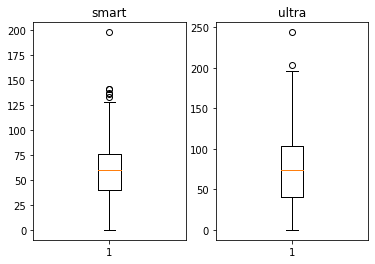

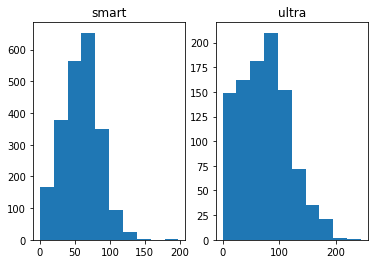

In [71]:
# получим cводную информацию по параметрам данных, расситаем дисперсию, построим графики
name = 'calls'
display('smart', df_smart[name].describe(), 'Дисперсия smart', np.var(df_smart[name]))
display('ultra', df_ultra[name].describe(), 'Дисперсия ultra', np.var(df_ultra[name]))
fig, axs = plt.subplots(1, 2)

axs[0].boxplot(df_smart[name])
axs[0].set_title('smart')
axs[1].boxplot(df_ultra[name])
axs[1].set_title('ultra');

fig, axs = plt.subplots(1, 2)

axs[0].hist(df_smart[name], bins=10)
axs[0].set_title('smart')
axs[1].hist(df_ultra[name], bins=10)
axs[1].set_title('ultra');

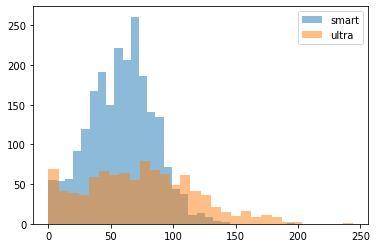

In [72]:
# сравним тарифы на гистограмме
x = [df_smart['calls']]
y = [df_ultra['calls']]

bins = 30

plt.hist(x, bins, alpha=0.5, label='smart')
plt.hist(y, bins, alpha=0.5, label='ultra')
plt.legend(loc='upper right')
plt.show()

---

**Выводы**

* как и в длительности вызывов  среднее количество вызывов в месяц по тарифу ультра больше 73 против 53 средних взывов в тарифе смарт.
* можно высчитать среднюю продолжительность разговора для тарифов это - 7,2 минуты, близко совпадает со средней продолжительностью разговора - 6,7 найденой на этапе предобработки начальных данных.
* в обоих тарифах 75% пользователей делают 40 и более вызывов в месяц.
* в ультре больше абонентов использющих более 120 вызывов в месяц.
* в обоих тарифах большинство не используют больше 120 минут в месяц.
* нагрузка на звонки растет, если в январе медиана для смарт было 20 вызывов в месяц и 51 для ультры, то в декабре соответсвенно - 65 и 82. Количество пользователей также вырастает в декабре.

### messages (сообщения)

In [73]:
# сравним данные по тарифам
df_pivot_messages = df.pivot_table(index= 'tariff', values= 'messages', aggfunc= ['sum', 'mean', 'median','std', 'count'])
# посмотрим результат
df_pivot_messages

,sum,mean,median,std,count
,messages,messages,messages,messages,messages
tariff,,,,,
smart,74413,33.384029,28,28.227876,2229
ultra,48623,49.363452,38,47.804457,985


In [74]:
# сравним данные по тарифам по месяцам
df_pivot_messages_month = df.pivot_table(index= ['month', 'tariff'], values= 'messages', aggfunc= ['sum', 'mean', 'median','std', 'count'])
# посмотрим результат
df_pivot_messages_month

sum       mean   median        std    count
             messages   messages messages   messages messages
month tariff                                                 
1     smart       620  18.235294     15.0  16.197753       34
      ultra       304  33.777778     32.0  30.670742        9
2     smart      1397  24.086207     20.0  21.750809       58
      ultra       527  21.958333      5.5  26.773574       24
3     smart      2453  31.857143     23.0  26.804710       77
      ultra      1195  32.297297     20.0  41.621886       37
4     smart      3443  30.741071     28.0  24.538532      112
      ultra      1736  31.563636     17.0  37.513831       55
5     smart      4762  33.773050     30.0  27.036845      141
      ultra      2536  37.850746     25.0  40.306874       67
6     smart      5478  33.402439     28.0  28.404337      164
      ultra      3505  41.726190     27.5  44.567899       84
7     smart      6784  33.751244     29.0  28.282288      201
      ultra      4536  49.846154     38.0  48.703621       91
8     smart      7905  33.638298     27.0  28.952677      235
      ultra      5183  48.439252     40.0  46.601923      107
9     smart      8746  33.638462     30.0  28.117927      260
      ultra      6013  52.286957     43.0  46.398874      115
10    smart      9927  33.765306     30.0  28.567673      294
      ultra      7187  58.430894     49.0  51.934398      123
11    smart     10768  34.075949     28.0  28.389031      316
      ultra      7476  55.791045     43.0  49.768951      134
12    smart     12130  35.994065     29.0  30.576990      337
      ultra      8425  60.611511     51.0  51.787821      139

'smart'

count    2229.000000
mean       33.384029
std        28.227876
min         0.000000
25%        10.000000
50%        28.000000
75%        51.000000
max       143.000000
Name: messages, dtype: float64

'Дисперсия smart'

796.8129584480083

'ultra'

count    985.000000
mean      49.363452
std       47.804457
min        0.000000
25%        6.000000
50%       38.000000
75%       79.000000
max      224.000000
Name: messages, dtype: float64

'Дисперсия ultra'

2285.2661425446736

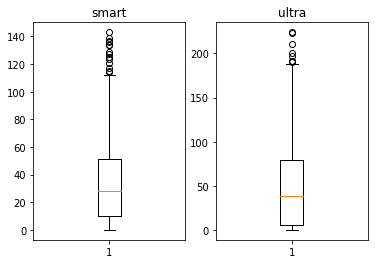

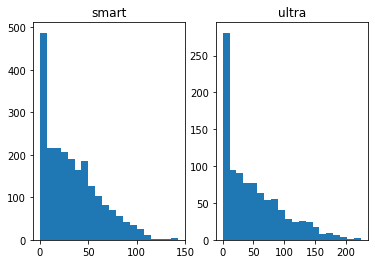

In [75]:
# получим cводную информацию по параметрам данных, расситаем дисперсию, построим графики
name = 'messages'
display('smart', df_smart[name].describe(), 'Дисперсия smart', np.var(df_smart[name]))
display('ultra', df_ultra[name].describe(), 'Дисперсия ultra', np.var(df_ultra[name]))
fig, axs = plt.subplots(1, 2)

axs[0].boxplot(df_smart[name])
axs[0].set_title('smart')
axs[1].boxplot(df_ultra[name])
axs[1].set_title('ultra');

fig, axs = plt.subplots(1, 2)

axs[0].hist(df_smart[name], bins=20)
axs[0].set_title('smart')
axs[1].hist(df_ultra[name], bins=20)
axs[1].set_title('ultra');

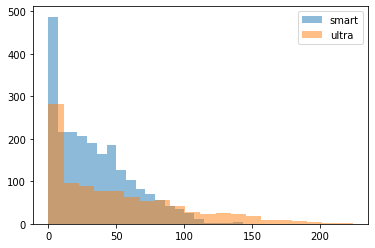

In [76]:
# сравним тарифы на гистограмме
x = [df_smart['messages']]
y = [df_ultra['messages']]

bins = 20

plt.hist(x, bins, alpha=0.5, label='smart')
plt.hist(y, bins, alpha=0.5, label='ultra')
plt.legend(loc='upper right')
plt.show()

---

**Выводы**

* из граффиков видно, что есть большая часть клиентов, которые не пользуются сообшениями - большая шкала на гистограммах в районе 0.
* опять же пользователи ультры чаще отправляют смс - в среднем 49 сообщений в месяц, а в смарте 33.
* в тарифе смарт 75% пользователей делают меньше 51 смс в месяц, есть рекордсмены на грфики видны выбросы больше 110 смс в месяц.
* в ультре основная масса абонентов делают не более 79 смс в месяц.
* медианные значения смс по году растет в начале года смарт - 15 смс в месяц, ультра - 32, в декабре 29 и 51 соответственно.

### internet (информация об интернет-сессиях) по месяцам

In [77]:
# сравним данные по тарифам
df_pivot_gb_used = df.pivot_table(index= 'tariff', values= 'gb_used', aggfunc= ['sum', 'mean', 'median','std', 'count'])
# посмотрим результат
df_pivot_gb_used

,sum,mean,median,std,count
,gb_used,gb_used,gb_used,gb_used,gb_used
tariff,,,,,
smart,36397,16.328847,17,5.747061,2229
ultra,19202,19.494416,19,9.853511,985


In [78]:
# сравним данные по тарифам по месяцам
df_pivot_gb_used_month = df.pivot_table(index= ['month', 'tariff'], values= 'gb_used', aggfunc= ['sum', 'mean', 'median','std', 'count'])
# посмотрим результат
df_pivot_gb_used_month

sum       mean  median        std   count
             gb_used    gb_used gb_used    gb_used gb_used
month tariff                                              
1     smart      297   8.735294     7.0   6.277950      34
      ultra      119  13.222222    15.0   6.666667       9
2     smart      687  11.844828    13.0   6.095157      58
      ultra      288  12.000000     7.5  10.446551      24
3     smart     1173  15.233766    16.0   5.705252      77
      ultra      653  17.648649    18.0  10.693238      37
4     smart     1526  13.625000    14.0   5.594600     112
      ultra      933  16.963636    17.0   9.457436      55
5     smart     2243  15.907801    16.0   5.862594     141
      ultra     1298  19.373134    19.0   9.779130      67
6     smart     2616  15.951220    16.0   5.649046     164
      ultra     1591  18.940476    19.5   9.077114      84
7     smart     3191  15.875622    16.0   5.780956     201
      ultra     1866  20.505495    20.0   9.819905      91
8     smart     3933  16.736170    17.0   5.480986     235
      ultra     2097  19.598131    19.0  10.254184     107
9     smart     4262  16.392308    16.0   5.087643     260
      ultra     2213  19.243478    20.0   9.287410     115
10    smart     4963  16.880952    17.0   5.735594     294
      ultra     2468  20.065041    20.0   9.552907     123
11    smart     5372  17.000000    17.0   5.213535     316
      ultra     2654  19.805970    18.5   9.684867     134
12    smart     6134  18.201780    18.0   5.457705     337
      ultra     3022  21.741007    22.0  10.160550     139

'smart'

count    2229.000000
mean       16.328847
std         5.747061
min         0.000000
25%        13.000000
50%        17.000000
75%        20.000000
max        38.000000
Name: gb_used, dtype: float64

'Дисперсия smart'

33.02870517811161

'ultra'

count    985.000000
mean      19.494416
std        9.853511
min        0.000000
25%       12.000000
50%       19.000000
75%       27.000000
max       49.000000
Name: gb_used, dtype: float64

'Дисперсия ultra'

97.09168626965459

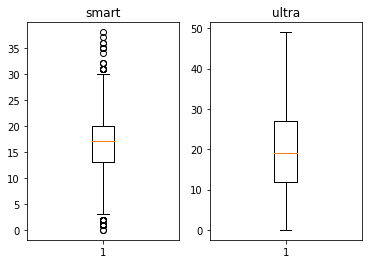

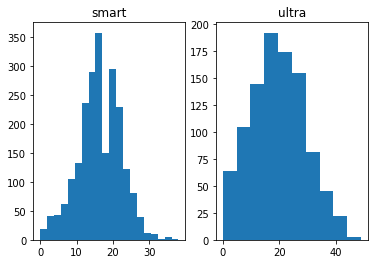

In [79]:
# получим cводную информацию по параметрам данных, расситаем дисперсию, построим графики
name = 'gb_used'
display('smart', df_smart[name].describe(), 'Дисперсия smart', np.var(df_smart[name]))
display('ultra', df_ultra[name].describe(), 'Дисперсия ultra', np.var(df_ultra[name]))
fig, axs = plt.subplots(1, 2)

axs[0].boxplot(df_smart[name])
axs[0].set_title('smart')
axs[1].boxplot(df_ultra[name])
axs[1].set_title('ultra');

fig, axs = plt.subplots(1, 2)

axs[0].hist(df_smart[name], bins=20)
axs[0].set_title('smart')
axs[1].hist(df_ultra[name])
axs[1].set_title('ultra');

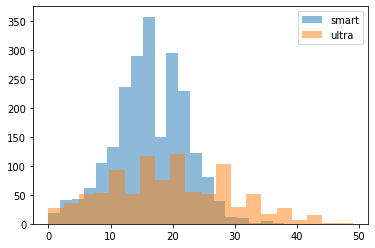

In [80]:
# сравним тарифы на гистограмме
x = [df_smart['gb_used']]
y = [df_ultra['gb_used']]

bins = 20

plt.hist(x, bins, alpha=0.5, label='smart')
plt.hist(y, bins, alpha=0.5, label='ultra')
plt.legend(loc='upper right')
plt.show()

---

**Выводы**

* объем потребленного траффика в тарифах почти одинаковое 16 гигабайт в среднем в смарт и 19,5 в ультре, а медианы потребления в месяц еще ближе 17 и 19 соответственно.
* в тарифе смарт есть не типичные пользователи - которые или совсем редко пользуются мобильным интернетом, или пользуются больше 30 гигабайт в месяц.
* несмотря на почти равные средние показатели среднего потребления 75 % пользователей смарт тратят меньше 20 гб в месяц, а 75% пользователей тратят до 27 гигов в месяц.
* и в смарте и в ультре тратят или до 15 или 20 и больше гигабайт в месяц. Это видно в "провале" на совмещенной гистограмме. 
* примечательно, что в январе медиана по траффику смарт была 7 гг/месяц, то в декабре 18, в ультре же относительный рост меньше с 15 до 22.

### Выводы анализ и описание данных

In [81]:
# сравним данные по тарифам по месяцам
df_pivot_reg_month_month = df.pivot_table(index= ['month', 'tariff'], values= 'reg_month', aggfunc= ['count'])
# посмотрим результат
df_pivot_reg_month_month

count
             reg_month
month tariff          
1     smart         34
      ultra          9
2     smart         58
      ultra         24
3     smart         77
      ultra         37
4     smart        112
      ultra         55
5     smart        141
      ultra         67
6     smart        164
      ultra         84
7     smart        201
      ultra         91
8     smart        235
      ultra        107
9     smart        260
      ultra        115
10    smart        294
      ultra        123
11    smart        316
      ultra        134
12    smart        337
      ultra        139

Проанализировав основные параметры активности пользователей из предоставленных данных можно сделать следующие выводы:

* количество пользователей растет от месяца к месяцу, и на годовые показатели влияют абоненты ставшие активными по году.
* видно что новые пользователи активнее предыдущих, что влияет на рост среднего потребления услуг.
* основные новые подключения в тарифе смарт.

## Проверка гипотез


Проверим 2 гипотезы:
* средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
* средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

### средняя выручка пользователей тарифов «Ультра» и «Смарт»

Визаулизируем выручку по тарифам

In [82]:
# сравним данные по тарифам
df_pivot_revenue_total = df.pivot_table(index= 'tariff', values= 'revenue_total', aggfunc= ['sum', 'mean', 'median','std', 'count'])
# посмотрим результат
df_pivot_revenue_total

,sum,mean,median,std,count
,revenue_total,revenue_total,revenue_total,revenue_total,revenue_total
tariff,,,,,
smart,2875351,1289.973531,1023,818.404367,2229
ultra,2039100,2070.152284,1950,376.187114,985


---

Не смотря на то что пользователей ультра в данных меньше больше чем в 2 раза общая выручка по году отличается на меньший порядок. Средняя месячная выручка смарт - 1023 рублей, в ультра - 1950, то есть дополнительных платежей в ультра делают реже.

In [83]:
# сравним данные по тарифам по месяцам
df_pivot_revenue_total_month = df.pivot_table(index= ['month', 'tariff'], values= 'revenue_total', aggfunc= ['sum', 'mean', 'median','std', 'count'])
# посмотрим результат
df_pivot_revenue_total_month

sum          mean        median           std  \
             revenue_total revenue_total revenue_total revenue_total   
month tariff                                                           
1     smart          24525    721.323529         550.0    438.766641   
      ultra          17550   1950.000000        1950.0      0.000000   
2     smart          48001    827.603448         550.0    540.702011   
      ultra          47400   1975.000000        1950.0     84.698955   
3     smart          89676   1164.623377         886.0    698.025091   
      ultra          74550   2014.864865        1950.0    207.787573   
4     smart         107866    963.089286         620.5    562.064543   
      ultra         110100   2001.818182        1950.0    196.252775   
5     smart         168849   1197.510638         986.0    722.973153   
      ultra         138000   2059.701493        1950.0    403.323204   
6     smart         197459   1204.018293         950.0    745.738005   
      ultra         171300   2039.285714        1950.0    315.948698   
7     smart         246014   1223.950249         981.0    738.470208   
      ultra         192750   2118.131868        1950.0    446.001774   
8     smart         310340   1320.595745        1079.0    792.224318   
      ultra         222900   2083.177570        1950.0    399.701771   
9     smart         324986   1249.946154         958.5    732.590262   
      ultra         232800   2024.347826        1950.0    246.854352   
10    smart         401267   1364.853741        1150.0    842.773037   
      ultra         254100   2065.853659        1950.0    386.891620   
11    smart         424403   1343.047468        1150.0    795.729727   
      ultra         280350   2092.164179        1950.0    409.375762   
12    smart         531965   1578.531157        1277.0   1034.735951   
      ultra         297300   2138.848921        1950.0    482.296858   

                     count  
             revenue_total  
month tariff                
1     smart             34  
      ultra              9  
2     smart             58  
      ultra             24  
3     smart             77  
      ultra             37  
4     smart            112  
      ultra             55  
5     smart            141  
      ultra             67  
6     smart            164  
      ultra             84  
7     smart            201  
      ultra             91  
8     smart            235  
      ultra            107  
9     smart            260  
      ultra            115  
10    smart            294  
      ultra            123  
11    smart            316  
      ultra            134  
12    smart            337  
      ultra            139

---

Медианная выручка ультра не изменялась по году, средняя выручка ультра тоже выросла не сильно. Ежемесячная выручка по тарифу смарт выросла больше чем в 2 раза за год.

'smart'

count    2229.000000
mean     1289.973531
std       818.404367
min       550.000000
25%       550.000000
50%      1023.000000
75%      1750.000000
max      6770.000000
Name: revenue_total, dtype: float64

'Дисперсия smart'

669785.7080064242

'ultra'

count     985.000000
mean     2070.152284
std       376.187114
min      1950.000000
25%      1950.000000
50%      1950.000000
75%      1950.000000
max      4800.000000
Name: revenue_total, dtype: float64

'Дисперсия ultra'

141516.7450786183

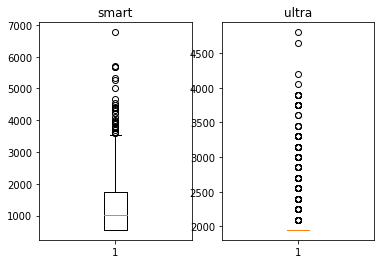

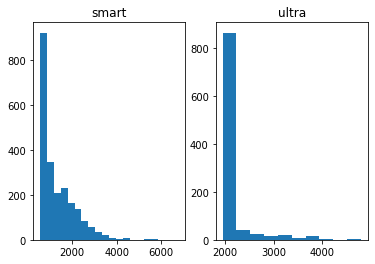

In [84]:
# получим cводную информацию по параметрам данных, расситаем дисперсию, построим графики
name = 'revenue_total'
display('smart', df_smart[name].describe(), 'Дисперсия smart', np.var(df_smart[name]))
display('ultra', df_ultra[name].describe(), 'Дисперсия ultra', np.var(df_ultra[name]))
fig, axs = plt.subplots(1, 2)

axs[0].boxplot(df_smart[name])
axs[0].set_title('smart')
axs[1].boxplot(df_ultra[name])
axs[1].set_title('ultra');

fig, axs = plt.subplots(1, 2)

axs[0].hist(df_smart[name], bins=20)
axs[0].set_title('smart')
axs[1].hist(df_ultra[name])
axs[1].set_title('ultra');

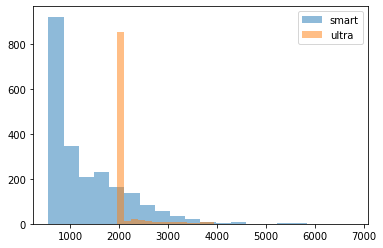

In [85]:
# сравним тарифы на гистограмме
x = [df_smart['revenue_total']]
y = [df_ultra['revenue_total']]

bins = 20

plt.hist(x, bins, alpha=0.5, label='smart')
plt.hist(y, bins, alpha=0.5, label='ultra')
plt.legend(loc='upper right')
plt.show()

Если минимальная ежемесячная выручка по ультре начинается с 1950 в месяц, половина пользователей смарта хватает чуть больше 1000. Средняя выручка в тарифе смарт 1289 рублей в месяц.

In [86]:
# допустим что: любая активность (минута разговора, смс, 1 гигабайт) - равновеликая и сравниваемая - единица активности
# вычислим вуручку, которая приходится на 1 единицу, разделим сумму всей выручка на сумму всех действий.
revenue_total_per_unit = df['revenue_total'].sum() / (df['duration'].sum() + df['messages'].sum() + df['gb_used'].sum())
revenue_total_per_unit_smart = df_smart['revenue_total'].sum() / (df_smart['duration'].sum() + df_smart['messages'].sum() + df_smart['gb_used'].sum())
revenue_total_per_unit_ultra = df_ultra['revenue_total'].sum() / (df_ultra['duration'].sum() + df_ultra['messages'].sum() + df_ultra['gb_used'].sum())
print('Выручка на 1 условную единицу активности по всем данным', round(revenue_total_per_unit,2))
print('Выручка на 1 условную единицу активности в тарифе смарт', round(revenue_total_per_unit_smart,2))
print('Выручка на 1 условную единицу активности в тарифе ультра', round(revenue_total_per_unit_ultra,2))

Выручка на 1 условную единицу активности по всем данным 3.02
Выручка на 1 условную единицу активности в тарифе смарт 2.76
Выручка на 1 условную единицу активности в тарифе ультра 3.48


---

При условном подходе, что любая активность (минута разговора, смс, 1 гигабайт) - равновеликая и сравниваемая - единица активности, можно увидеть, что тариф смарт приносит меньше, а ультра гораздо больше. Скорее всего, себестоимость услуг для тарифов одинаков, тариф ультра прибыльнее для компании на 26%

Сформулируем нулевую гипотезу

* H₀: "средняя выручка пользователей тарифов «Ультра» и «Смарт» одинакова"

Тогда исходя из H₀ формулируем альтернативную гипотезу 

* H₁: «средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются»

In [87]:

# вычислим уровень статистической значимости 
results = st.stats.ttest_ind(df_smart['revenue_total'],  df_ultra['revenue_total'], equal_var = False)
# выведем результат
print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу, средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются")
else:
    print("Не получилось отвергнуть нулевую гипотезу, средняя выручка пользователей тарифов «Ультра» и «Смарт» одинакова")

p-значение:  4.260631393081911e-250
Отвергаем нулевую гипотезу, средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются


### средняя выручка пользователей из Москвы и из других регионов

In [88]:
# выделим все записи по городам в отдельные базы
df_moskow = df.query('city == "москва"')
df_not_moskow = df.query('city != "москва"')

'moskow'

count     611.000000
mean     1546.713584
std       752.088071
min       550.000000
25%       780.500000
50%      1750.000000
75%      1950.000000
max      5321.000000
Name: revenue_total, dtype: float64

'Дисперсия moskow'

565636.467011886

'not_moskow'

count    2603.000000
mean     1524.936227
std       808.787752
min       550.000000
25%       750.000000
50%      1583.000000
75%      1950.000000
max      6770.000000
Name: revenue_total, dtype: float64

'Дисперсия not_moskow'

654137.6285218114

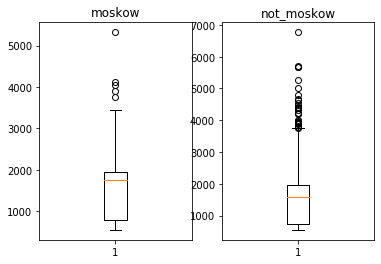

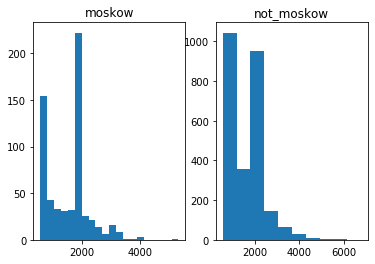

In [89]:
# получим cводную информацию по параметрам данных, расситаем дисперсию, построим графики
name = 'revenue_total'
display('moskow', df_moskow[name].describe(), 'Дисперсия moskow', np.var(df_moskow[name]))
display('not_moskow', df_not_moskow[name].describe(), 'Дисперсия not_moskow', np.var(df_not_moskow[name]))
fig, axs = plt.subplots(1, 2)

axs[0].boxplot(df_moskow[name])
axs[0].set_title('moskow')
axs[1].boxplot(df_not_moskow[name])
axs[1].set_title('not_moskow');

fig, axs = plt.subplots(1, 2)

axs[0].hist(df_moskow[name], bins=20)
axs[0].set_title('moskow')
axs[1].hist(df_not_moskow[name])
axs[1].set_title('not_moskow');

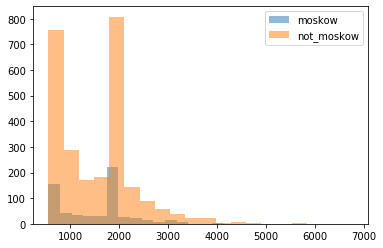

In [90]:
# сравним тарифы на гистограмме
x = [df_moskow['revenue_total']]
y = [df_not_moskow['revenue_total']]

bins = 20

plt.hist(x, bins, alpha=0.5, label='moskow')
plt.hist(y, bins, alpha=0.5, label='not_moskow')
plt.legend(loc='upper right')
plt.show()

Сформулируем нулевую гипотезу

* H₀: "средняя выручка пользователей из Москвы и из других регионов одинакова"

Тогда исходя из H₀ формулируем альтернативную гипотезу 

* H₁: «средняя выручка пользователей из Москвы не ровна выручки пользователей из других регионов»

In [91]:
alpha = .05 # критический уровень статистической значимости
# вычислим уровень статистической значимости 
results = st.stats.ttest_ind(df_moskow['revenue_total'],  df_not_moskow['revenue_total'], equal_var = False)
# Выведем результат
print('p-значение: ', results.pvalue) # введите ваш код тут
if results.pvalue < alpha: # введите ваш код тут:
    print("Отвергаем нулевую гипотезу, средняя выручка пользователей из Москвы не ровна выручки пользователей из других регионов")
else:
    print("Не получилось отвергнуть нулевую гипотезу, средняя выручка пользователей из Москвы и из других регионов одинакова")

p-значение:  0.5257376663729292
Не получилось отвергнуть нулевую гипотезу, средняя выручка пользователей из Москвы и из других регионов одинакова


---

Сравнивая Москву и "не Москву" можно сделать однозначный вывод - пользователи тратят примерно одинаковые суммы на связь около 1530 рублей в месяц. Проверка статистическим методом также явно показала, что выручка по тарифам одинакова.

## Выводы

Итак,на вопрос Коммерческого департамента - какой тариф приносит больше денег из двух тарифных планов?

Ответ:

Исследование выявило, что тарифы приносят разную выручку, ультра выгоднее для компании, город не имеет значение.


В теле исследования получили большое количество промежуточных итогов:
* объем потребления услуг в разрезе тарифов
* виден рост в течении года